In [54]:
#import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data cleanning 

In [55]:
import os
os.getcwd()

'/home/ping/code/public-health/stackoverflow/notebook'

In [56]:
csv_path ='/home/ping/code/public-health/stackoverflow/data'

In [57]:
data = pd.read_csv(os.path.join(csv_path, 'QueryResults.csv'))

In [58]:
data.head()

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
0,Import CSV file to strongly typed data structu...,<p>What's the best way to import a CSV file in...,<c#><vb.net><file><csv><import>,1898,109,69257,28,11
1,Change hash without reload in jQuery,<p>I have the following code:</p>\n\n<pre><cod...,<jquery><hash><reload><fragment-identifier><wi...,1939041,56,113780,14,5
2,Pass by reference or pass by value?,"<p>When learning a new programming language, o...",<language-agnostic><oop><parameters><pass-by-r...,2027,52,18382,19,11
3,What are MVP and MVC and what is the difference?,"<p>When looking beyond the <a href=""https://en...",<user-interface><model-view-controller><design...,2056,2319,550884,1357,24
4,LINQ on the .NET 2.0 Runtime,<p>Can a LINQ enabled app run on a machine tha...,<.net><linq><.net-3.5><.net-2.0><clr>,2138,61,56573,13,8


In [59]:
data.shape

(27933, 8)

In [60]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27933 entries, 0 to 27932
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Title          27933 non-null  object
 1   Body           27933 non-null  object
 2   Tags           27933 non-null  object
 3   Id             27933 non-null  int64 
 4   Score          27933 non-null  int64 
 5   ViewCount      27933 non-null  int64 
 6   FavoriteCount  27933 non-null  int64 
 7   AnswerCount    27933 non-null  int64 
dtypes: int64(5), object(3)
memory usage: 1.7+ MB


In [61]:
data.dtypes.value_counts()

int64     5
object    3
dtype: int64

In [62]:
data.nunique()

Title            27933
Body             27933
Tags             27447
Id               27933
Score             1095
ViewCount        25519
FavoriteCount      588
AnswerCount         76
dtype: int64

In [63]:
# NaN and duplicates
data.isna().sum()

Title            0
Body             0
Tags             0
Id               0
Score            0
ViewCount        0
FavoriteCount    0
AnswerCount      0
dtype: int64

In [64]:
data.duplicated(subset="Body").sum()

0

In [65]:
for col in data.columns:
    n =data.duplicated(subset=col).sum()
    print(f"col:{col}-> duplicated:{n}")

col:Title-> duplicated:0
col:Body-> duplicated:0
col:Tags-> duplicated:486
col:Id-> duplicated:0
col:Score-> duplicated:26838
col:ViewCount-> duplicated:2414
col:FavoriteCount-> duplicated:27345
col:AnswerCount-> duplicated:27857


In [66]:
data.duplicated(subset="Tags", keep ="first")

0        False
1        False
2        False
3        False
4        False
         ...  
27928    False
27929    False
27930    False
27931    False
27932    False
Length: 27933, dtype: bool

In [67]:
idx = data.duplicated(subset="Tags", keep="first")
data.loc[idx, :].sort_values("Tags")

,Title,Body,Tags,Id,Score,ViewCount,FavoriteCount,AnswerCount
23904,"""UNPROTECTED PRIVATE KEY FILE!"" Error using SS...",<p>I've created a new linux instance on Amazon...,<amazon-web-services><authentication><ssh><ama...,8193768,915,629086,214,41
26248,How can I modify ripple color when using ?attr...,<p>I've seen some SO questions and they gave s...,<android><android-layout><android-5.0-lollipop...,33061050,129,75463,50,8
25503,Got exception: fragment already active,<p>I have a <strong>fragment</strong>;</p>\n\n...,<android><android-layout><android-intent><andr...,10364478,58,42096,15,8
3739,gen already exists but is not a source folder,"<p>I am developing my Android project, After I...",<android><android-layout><android-intent><andr...,9532045,92,57301,22,15
5956,how append date build to versionNameSuffix on ...,<p>I am using Android Studio and I need to app...,<android><android-studio><gradle><android-grad...,19172565,89,64171,20,7
...,...,...,...,...,...,...,...,...
24361,What is the 'shadow space' in x64 assembly?,<p>I found plenty of topics about this shadow ...,<windows><assembly><x86-64><calling-convention...,30190132,36,15837,12,2
24420,Variables are not behaving as expected,<p>I've been wrestling trying to get the synta...,<windows><batch-file><cmd><environment-variabl...,30282784,26,9116,14,1
27355,Where is the Write-Combining Buffer located? x86,<p>How is the Write-Combine buffer physically ...,<x86><intel><cpu-architecture><cpu-cache><amd-...,49959963,15,5274,12,3
26789,"xmlns, xmlns:xsi, xsi:schemaLocation, and targ...",<p>For the following XML fragment:</p>\n\n<pre...,<xml><xsd><xml-namespaces><xsd-validation><xml...,34202967,76,59893,31,2


In [68]:
# Data Describe
data.describe(include=np.number)

,Id,Score,ViewCount,FavoriteCount,AnswerCount
count,2.793300e+04,27933.000000,2.793300e+04,27933.000000,27933.000000
mean,1.690787e+07,114.001360,1.120698e+05,42.705044,7.154871
std,1.541228e+07,351.730108,2.467875e+05,145.693052,6.789046
min,4.000000e+00,6.000000,2.760000e+02,11.000000,1.000000
25%,4.211909e+06,29.000000,2.183900e+04,14.000000,3.000000
50%,1.213544e+07,51.000000,4.900500e+04,19.000000,5.000000
75%,2.618065e+07,99.000000,1.122840e+05,35.000000,9.000000
max,7.290447e+07,26631.000000,1.030442e+07,11654.000000,128.000000


In [69]:
data.describe(include=object)

,Title,Body,Tags
count,27933,27933,27933
unique,27933,27933,27447
top,Import CSV file to strongly typed data structu...,<p>What's the best way to import a CSV file in...,<java><spring><jpa><spring-data><spring-data-jpa>
freq,1,1,19


In [70]:
cols = ["Id", "Title", "Body", "Tags"]
df =data[cols]
df.head()

,Id,Title,Body,Tags
0,1898,Import CSV file to strongly typed data structu...,<p>What's the best way to import a CSV file in...,<c#><vb.net><file><csv><import>
1,1939041,Change hash without reload in jQuery,<p>I have the following code:</p>\n\n<pre><cod...,<jquery><hash><reload><fragment-identifier><wi...
2,2027,Pass by reference or pass by value?,"<p>When learning a new programming language, o...",<language-agnostic><oop><parameters><pass-by-r...
3,2056,What are MVP and MVC and what is the difference?,"<p>When looking beyond the <a href=""https://en...",<user-interface><model-view-controller><design...
4,2138,LINQ on the .NET 2.0 Runtime,<p>Can a LINQ enabled app run on a machine tha...,<.net><linq><.net-3.5><.net-2.0><clr>


In [71]:
df.to_csv("data_cleaned.csv")

In [72]:
pd.read_csv("data_cleaned.csv")

,Unnamed: 0,Id,Title,Body,Tags
0,0,1898,Import CSV file to strongly typed data structu...,<p>What's the best way to import a CSV file in...,<c#><vb.net><file><csv><import>
1,1,1939041,Change hash without reload in jQuery,<p>I have the following code:</p>\n\n<pre><cod...,<jquery><hash><reload><fragment-identifier><wi...
2,2,2027,Pass by reference or pass by value?,"<p>When learning a new programming language, o...",<language-agnostic><oop><parameters><pass-by-r...
3,3,2056,What are MVP and MVC and what is the difference?,"<p>When looking beyond the <a href=""https://en...",<user-interface><model-view-controller><design...
4,4,2138,LINQ on the .NET 2.0 Runtime,<p>Can a LINQ enabled app run on a machine tha...,<.net><linq><.net-3.5><.net-2.0><clr>
...,...,...,...,...,...
27928,27928,37332190,Django - Login with Email,<p>I want django to authenticate users via ema...,<python><python-3.x><django><django-authentica...
27929,27929,37334668,Is there a python equivalent for RSpec to do TDD?,<p>I'm looking for a test framework like Ruby'...,<python><ruby><testing><rspec><tdd>
27930,27930,55345373,How to install GCC/G++ 8 on CentOS,<p>I'm used to install packages on Debian/Ubun...,<gcc><centos><g++><software-collections><redha...
27931,27931,55372259,How to use TabLayout with ViewPager2 in Android,<p>I want to use <code>com.google.android.mate...,<java><android><androidx><android-tablayout><a...


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27933 entries, 0 to 27932
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Id      27933 non-null  int64 
 1   Title   27933 non-null  object
 2   Body    27933 non-null  object
 3   Tags    27933 non-null  object
dtypes: int64(1), object(3)
memory usage: 873.0+ KB


In [74]:
import nltk

In [75]:
#nltk.download('stopwords')

In [76]:
#nltk.download('punkt')

In [77]:
#nltk.download('wordnet')

In [78]:
#nltk.download('omw-1.4')

In [79]:
df = df[['Id', 'Title', 'Body', 'Tags']]

In [80]:
df=df.sample(frac=0.1)
df.shape

(2793, 4)

In [81]:
df=df.drop_duplicates()
df.dropna(inplace=True)
df.head()

,Id,Title,Body,Tags
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...


# Preprocessing

❓ **Question (Cleaning Text)** ❓

- Write a function `preprocessing` that will clean a sentence and apply it to all our reviews. It should:
    - remove whitespace
    - lowercase characters
    - remove numbers
    - remove punctuation
    - tokenize
    - lemmatize
- You can store the cleaned reviews into a column called `cleaned_reviews`.
- Do not remove stopwords in this challenge, we will explain why in the section `3. N-gram modelling`

In [82]:
import string
from nltk import word_tokenize
from nltk.stem import WordNetLemmatizer

def preprocessing(sentence):
    # $CHALLENGIFY_BEGIN

    # Removing whitespaces
    sentence = sentence.strip()    
    # Lowercasing
    sentence = sentence.lower()
    # Removing numbers
    sentence = ''.join(char for char in sentence if not char.isdigit())
    # Removing punctuation
    for punctuation in string.punctuation:
        sentence = sentence.replace(punctuation, '') 
    # Tokenizing
    tokenized = word_tokenize(sentence)
    # Lemmatizing
    lemmatizer = WordNetLemmatizer()
    lemmatized = [lemmatizer.lemmatize(word) for word in tokenized]
    cleaned_sentence = " ".join(lemmatized)
    return cleaned_sentence  

In [83]:
#import spacy
#import en_core_web_sm

In [84]:
#nlp_en = en_core_web_sm.load()

In [85]:
#df['sentence_bow_lem'] = df['sentence_bow'].apply(lambda x : " ".join([token.lemma_ for token in nlp_en(x)
                                                                 # if(token.pos_ in["NOUN","PROPN"])
                                                                 # ]))

In [86]:
#https://www.kaggle.com/code/vikashrajluhaniwal/multi-label-classification-for-tag-predictions

In [87]:
# Clean reviews
# $CHALLENGIFY_BEGIN
df['clean_title'] = df.Title.apply(preprocessing)
df.head()

,Id,Title,Body,Tags,clean_title
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...


In [88]:
df['clean_body'] = df.Body.apply(preprocessing)
df.head()

,Id,Title,Body,Tags,clean_title,clean_body
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...


In [89]:
import string
def remove_punctuation(Tags):
    for punctuation in string.punctuation:
        Tags = Tags.replace(punctuation, ' ')
    return Tags
df['clean_tags'] = df.Tags.apply(remove_punctuation)
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,php email registration email validation d...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,c multithreading gcc c 11 x86
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,c java android xamarin dot42
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,git version control diff cvs mercurial
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,java multithreading tomcat jakarta ee jak...


In [90]:
def remove_numbers(Tags):
    words_only = ''.join([i for i in Tags if not i.isdigit()])
    return words_only
df['clean_tags'] = df.clean_tags.apply(remove_numbers)
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,php email registration email validation d...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,c multithreading gcc c x
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,c java android xamarin dot
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,git version control diff cvs mercurial
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,java multithreading tomcat jakarta ee jak...


In [91]:
from nltk.corpus import stopwords
from nltk import word_tokenize
stop_words = set(stopwords.words('english'))

def remove_stopwords(Tags):
    tokenized =word_tokenize(Tags)
    without_stopwords = [word for word in tokenized if not word in stop_words]
    return without_stopwords
df['clean_tags'] = df.clean_tags.apply(remove_stopwords)
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,"[php, email, registration, email, validation, ..."
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,"[c, multithreading, gcc, c, x]"
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,"[c, java, android, xamarin, dot]"
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,"[git, version, control, diff, cvs, mercurial]"
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,"[java, multithreading, tomcat, jakarta, ee, ja..."


In [92]:
from nltk.stem import WordNetLemmatizer
def lemma(Tags):
    lemmatizer = WordNetLemmatizer()# Instantiate lemmatizer
    lemmatized = [lemmatizer.lemmatize(word) for word in Tags]#Lemmatize
    lemmatized_string = ' '.join(lemmatized)
    return lemmatized_string
df['clean_tags'] = df.clean_tags.apply(lemma)
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,php email registration email validation dispos...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,c multithreading gcc c x
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,c java android xamarin dot
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,git version control diff cv mercurial
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,java multithreading tomcat jakarta ee jakarta ...


# Analysis clean text

In [93]:
# reviey the dataset
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,php email registration email validation dispos...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,c multithreading gcc c x
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,c java android xamarin dot
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,git version control diff cv mercurial
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,java multithreading tomcat jakarta ee jakarta ...


In [95]:
# check the data columns
df.columns

Index(['Id', 'Title', 'Body', 'Tags', 'clean_title', 'clean_body',
       'clean_tags'],
      dtype='object')

In [96]:
df['full_review'] =df['Title'].fillna('') + " " \
            + df['Body'].fillna('')

In [97]:
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags,full_review
12845,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,php email registration email validation dispos...,How to block Disposable Email Addresses in you...
4276,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,c multithreading gcc c x,Why GCC does not use LOAD(without fence) and S...
24866,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,c java android xamarin dot,How to compare the performance of Android Apps...
9784,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,git version control diff cv mercurial,Diffing between two entire directories/project...
1596,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,java multithreading tomcat jakarta ee jakarta ...,Illegal access: this web application instance ...


In [98]:
df.shape

(2793, 8)

In [99]:
df = df.reset_index(drop = True)

In [100]:
df.head()

,Id,Title,Body,Tags,clean_title,clean_body,clean_tags,full_review
0,10976706,How to block Disposable Email Addresses in you...,<p>I would like to know of the possible ways t...,<php><email><registration><email-validation><d...,how to block disposable email address in your ...,pi would like to know of the possible way to b...,php email registration email validation dispos...,How to block Disposable Email Addresses in you...
1,19047327,Why GCC does not use LOAD(without fence) and S...,<p>Here are four approaches to make Sequential...,<c++><multithreading><gcc><c++11><x86>,why gcc doe not use loadwithout fence and stor...,phere are four approach to make sequential con...,c multithreading gcc c x,Why GCC does not use LOAD(without fence) and S...
2,17134522,How to compare the performance of Android Apps...,<p>I came across Xamarin claims that their Mon...,<c#><java><android><xamarin><dot42>,how to compare the performance of android apps...,pi came across xamarin claim that their mono i...,c java android xamarin dot,How to compare the performance of Android Apps...
3,1791854,Diffing between two entire directories/project...,<p>I inherited a project originally stored in ...,<git><version-control><diff><cvs><mercurial>,diffing between two entire directoriesprojects...,pi inherited a project originally stored in cv...,git version control diff cv mercurial,Diffing between two entire directories/project...
4,4945153,Illegal access: this web application instance ...,<p>I have a class which has an init-method def...,<java><multithreading><tomcat><jakarta-ee><jak...,illegal access this web application instance h...,pi have a class which ha an initmethod defined...,java multithreading tomcat jakarta ee jakarta ...,Illegal access: this web application instance ...


In [101]:
df['clean_tags'].shape

(2793,)

In [102]:
## https://www.kaggle.com/code/anubhavpoonia/notebook9e650d573f

# New Dataframe

In [103]:
df1 = df[['Id','full_review', 'clean_tags']]

In [104]:
df1

,Id,full_review,clean_tags
0,10976706,How to block Disposable Email Addresses in you...,php email registration email validation dispos...
1,19047327,Why GCC does not use LOAD(without fence) and S...,c multithreading gcc c x
2,17134522,How to compare the performance of Android Apps...,c java android xamarin dot
3,1791854,Diffing between two entire directories/project...,git version control diff cv mercurial
4,4945153,Illegal access: this web application instance ...,java multithreading tomcat jakarta ee jakarta ...
...,...,...,...
2788,27742285,What is primary and secondary clustering in ha...,algorithm data structure hash quadratic probin...
2789,8476805,Recommendations for using graphs theory in mac...,algorithm math artificial intelligence machine...
2790,5427656,iOS UIImagePickerController result image orien...,io iphone cocoa touch uiimage uiimagepickercon...
2791,6246381,Getting localized message from resourceBundle ...,java spring localization annotation resourcebu...


## Tags

Let's do some cleaning on the tags' column. Furthermore, I decided to keep the 100 most popular tags because I'll be easier to predict the right tag from 100 words than from 14,000 and because we want to keep macro tags and not be too specific since it's only a recommendation for a post, the user can add more specific tags himself.

In [105]:
df1['Tags'] = df1['clean_tags'].apply(lambda x: x.split())

/tmp/ipykernel_3999/3375866286.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tags'] = df1['clean_tags'].apply(lambda x: x.split())


In [106]:
all_tags = [item for sublist in df1['clean_tags'].values for item in sublist]

In [107]:
my_set = set(all_tags)
unique_tags = list(my_set)
len(unique_tags)

27

In [108]:
flat_list = [item for sublist in df1['Tags'].values for item in sublist]

keywords = nltk.FreqDist(flat_list)

keywords = nltk.FreqDist(keywords)

frequencies_words = keywords.most_common(100)
tags_features = [word[0] for word in frequencies_words]

In [109]:
tags_features

['c',
 'android',
 'python',
 'net',
 'java',
 'io',
 'javascript',
 'asp',
 'sql',
 'iphone',
 'spring',
 'objective',
 'html',
 'jquery',
 'mvc',
 'xcode',
 'google',
 'linux',
 'database',
 'php',
 'core',
 'api',
 'j',
 'studio',
 'server',
 'ruby',
 'cs',
 'cocoa',
 'git',
 'swift',
 'image',
 'data',
 'mysql',
 'x',
 'web',
 'visual',
 'http',
 'node',
 'window',
 'performance',
 'file',
 'django',
 'apache',
 'touch',
 'json',
 'testing',
 'rail',
 'memory',
 'framework',
 'algorithm',
 'design',
 'learning',
 'macos',
 'entity',
 'multithreading',
 'bash',
 'string',
 'r',
 'unit',
 'event',
 'panda',
 'array',
 'type',
 'processing',
 'spark',
 'authentication',
 'machine',
 'interface',
 'security',
 'library',
 'service',
 'rest',
 'ubuntu',
 'amazon',
 'ssl',
 'jpa',
 'shell',
 'ajax',
 'optimization',
 'function',
 'wpf',
 'class',
 'xml',
 'hibernate',
 'gradle',
 'chrome',
 'numpy',
 'command',
 'reactjs',
 'programming',
 'gcc',
 'reference',
 'cpu',
 'code',
 'line',
 

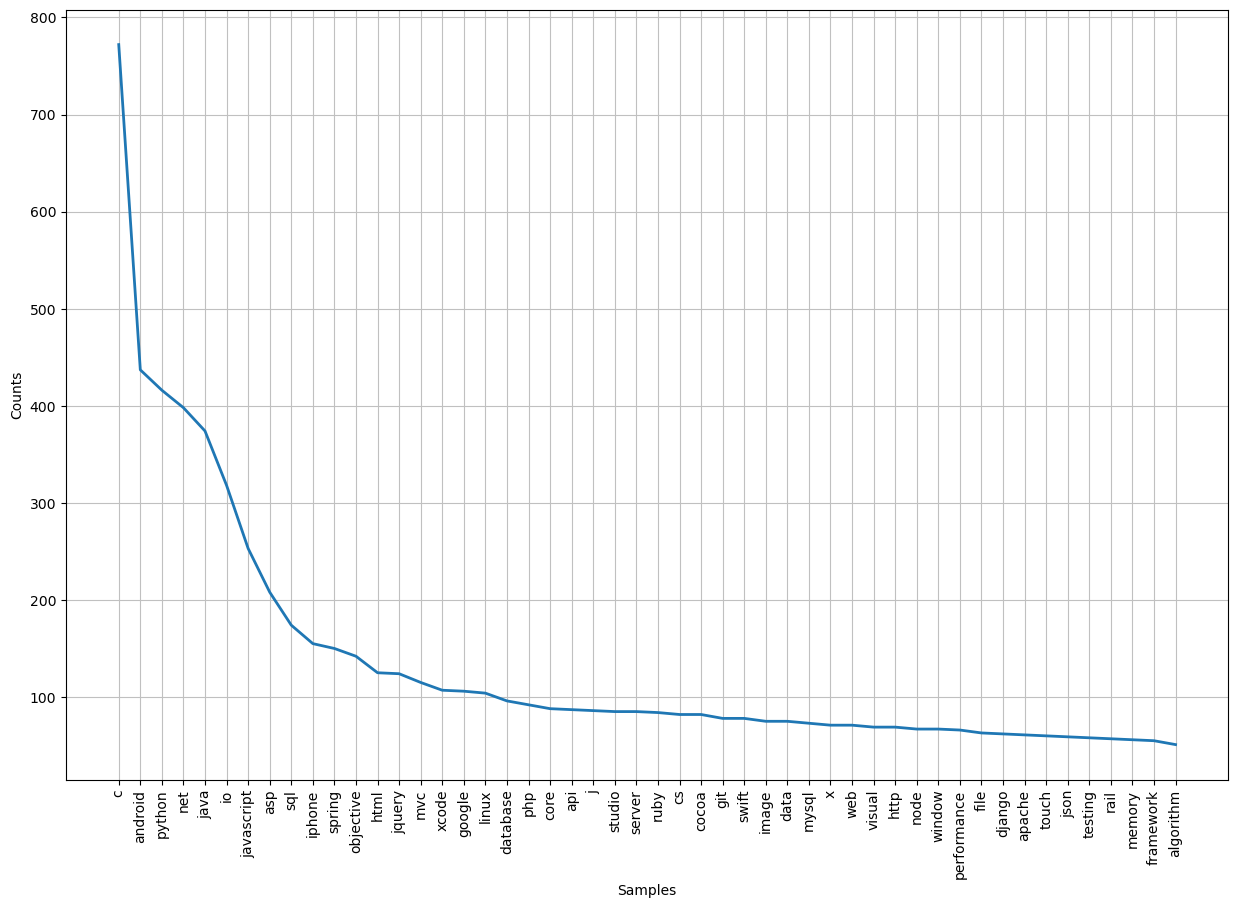

<AxesSubplot:xlabel='Samples', ylabel='Counts'>

In [110]:
fig, ax = plt.subplots(figsize=(15, 10))
keywords.plot(50, cumulative=False)

In [111]:
def most_common(tags):
    tags_filtered = []
    for i in range(0, len(tags)):
        if tags[i] in tags_features:
            tags_filtered.append(tags[i])
    return tags_filtered

In [112]:
df1['Tags'] = df1['Tags'].apply(lambda x: most_common(x))
df1['Tags'] = df1['Tags'].apply(lambda x: x if len(x)>0 else None)

/tmp/ipykernel_3999/613312627.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tags'] = df1['Tags'].apply(lambda x: most_common(x))
/tmp/ipykernel_3999/613312627.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Tags'] = df1['Tags'].apply(lambda x: x if len(x)>0 else None)


In [113]:
df1.shape

(2793, 4)

In [114]:
df1.dropna(subset=['Tags'], inplace=True)

/tmp/ipykernel_3999/1337759825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.dropna(subset=['Tags'], inplace=True)


In [115]:
df1.shape

(2705, 4)

In [116]:
df1.head()

,Id,full_review,clean_tags,Tags
0,10976706,How to block Disposable Email Addresses in you...,php email registration email validation dispos...,[php]
1,19047327,Why GCC does not use LOAD(without fence) and S...,c multithreading gcc c x,"[c, multithreading, gcc, c, x]"
2,17134522,How to compare the performance of Android Apps...,c java android xamarin dot,"[c, java, android]"
3,1791854,Diffing between two entire directories/project...,git version control diff cv mercurial,[git]
4,4945153,Illegal access: this web application instance ...,java multithreading tomcat jakarta ee jakarta ...,"[java, multithreading]"


## Title + Body = full_review

In the next two columns: Body and Title, I'll use lots of text processing:
````
Removing html format
Lowering text
Transforming abbreviations
Removing punctuation (but keeping words like c# since it's the most popular tag)
Lemmatizing words
Removing stop words``
````

In [117]:
import re

In [118]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub(r"\'\xa0", " ", text)
    text = re.sub('\s+', ' ', text)
    text = text.strip(' ')
    return text

In [119]:
df1['full_review'] = df1['full_review'].apply(lambda x: clean_text(x)) 

/tmp/ipykernel_3999/275065161.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['full_review'] = df1['full_review'].apply(lambda x: clean_text(x))


In [120]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt
import matplotlib.lines as mlines
import seaborn as sns

import warnings

import pickle
import time

import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from string import punctuation

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit
from sklearn.dummy import DummyClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier
from sklearn.svm import LinearSVC
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import model_selection
from sklearn.metrics import make_scorer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import hamming_loss
from sklearn.cluster import KMeans


import logging

from scipy.sparse import hstack

warnings.filterwarnings("ignore")
plt.style.use('bmh')
%matplotlib inline

In [121]:
token=ToktokTokenizer()

In [122]:
punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [123]:
punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~'

In [124]:
def strip_list_noempty(mylist):
    newlist = (item.strip() if hasattr(item, 'strip') else item for item in mylist)
    return [item for item in newlist if item != '']

In [125]:
def clean_punct(text): 
    words=token.tokenize(text)
    punctuation_filtered = []
    regex = re.compile('[%s]' % re.escape(punct))
    remove_punctuation = str.maketrans(' ', ' ', punct)
    for w in words:
        if w in tags_features:
            punctuation_filtered.append(w)
        else:
            punctuation_filtered.append(regex.sub('', w))
  
    filtered_list = strip_list_noempty(punctuation_filtered)
        
    return ' '.join(map(str, filtered_list))

In [126]:
df1['full_review'][2]

'how to compare the performance of android apps written in java and xamarin c#? anyway to check quantitative data (code & results) <p>i came across xamarin claims that their mono implementation on android and their c# compiled apps are faster than java code. did anyone perform actual benchmarks on very similar java and c# code on different android platforms to verify such claims, could post the code and results?</p> <h3>added june 18, 2013</h3> <p>since there was no answer and could not find such benchmarks done by others, decided to do my own tests. unfortunately, my question remains "locked" so i cannot post this as the answer, only edit the question. please vote to re-open this question. for c#, i used xamarin.android ver. 4.7.09001 (beta). the source code, all the data i used for testing and compiled apk packages are on github:</p> <p>java: <a href="https://github.com/gregko/ttssetup_java" rel="noreferrer">https://github.com/gregko/ttssetup_java</a></p> <p>c#: <a href="https://gith

In [127]:
df1['full_review'] = df1['full_review'].apply(lambda x: clean_punct(x)) 

In [128]:
df1['full_review'][2]

'how to compare the performance of android apps written in java and xamarin c anyway to check quantitative data code amp results pi came across xamarin claims that their mono implementation on android and their c compiled apps are faster than java code did anyone perform actual benchmarks on very similar java and c code on different android platforms to verify such claims could post the code and resultsp h3added june 18 2013h3 psince there was no answer and could not find such benchmarks done by others decided to do my own tests unfortunately my question remains locked so i cannot post this as the answer only edit the question please vote to re-open this question for c i used xamarinandroid ver 4709001 beta the source code all the data i used for testing and compiled apk packages are on github p pjava a href httpsgithubcomgregkottssetupjava rel noreferrer httpsgithubcomgregkottssetupjavaap pc a href httpsgithubcomgregkottssetupcsharp rel noreferrer httpsgithubcomgregkottssetupcsharpap 

In [129]:
lemma=WordNetLemmatizer()
stop_words = set(stopwords.words("english"))

In [130]:
def lemitizeWords(text):
    words=token.tokenize(text)
    listLemma=[]
    for w in words:
        x=lemma.lemmatize(w, pos="v")
        listLemma.append(x)
    return ' '.join(map(str, listLemma))

def stopWordsRemove(text):
    stop_words = set(stopwords.words("english"))
    words=token.tokenize(text)
    filtered = [w for w in words if not w in stop_words]
    return ' '.join(map(str, filtered))

In [131]:
df1['full_review'] = df1['full_review'].apply(lambda x: lemitizeWords(x)) 
df1['full_review'] = df1['full_review'].apply(lambda x: stopWordsRemove(x)) 

In [132]:
df1

,Id,full_review,clean_tags,Tags
0,10976706,block disposable email address website registr...,php email registration email validation dispos...,[php]
1,19047327,gcc use load without fence storesfence sequent...,c multithreading gcc c x,"[c, multithreading, gcc, c, x]"
2,17134522,compare performance android apps write java xa...,c java android xamarin dot,"[c, java, android]"
3,1791854,diffing two entire directoriesprojects hg git ...,git version control diff cv mercurial,[git]
4,4945153,illegal access web application instance stop a...,java multithreading tomcat jakarta ee jakarta ...,"[java, multithreading]"
...,...,...,...,...
2788,27742285,primary secondary cluster hash pi confuse last...,algorithm data structure hash quadratic probin...,"[algorithm, data]"
2789,8476805,recommendations use graph theory machine learn...,algorithm math artificial intelligence machine...,"[algorithm, machine, learning]"
2790,5427656,ios uiimagepickercontroller result image orien...,io iphone cocoa touch uiimage uiimagepickercon...,"[io, iphone, cocoa, touch]"
2791,6246381,get localize message resourcebundle via annota...,java spring localization annotation resourcebu...,"[java, spring]"


In [133]:
df1.to_csv("data_cleaned_1.csv")

In [134]:
#pd.read_csv("data_cleaned_1.csv")

# LDA

Here I'll just use some LDA to see if shows any paterns in words and the main topics.

In [135]:
n_components=20

In [136]:
text = df1['full_review']

In [137]:
vectorizer_train = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [138]:
TF_IDF_matrix = vectorizer_train.fit_transform(text)

In [139]:
from sklearn.decomposition import LatentDirichletAllocation

In [140]:
lda = LatentDirichletAllocation(n_components=20, max_iter=5, learning_method='online', learning_offset=50,random_state=11).fit(TF_IDF_matrix)

In [141]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("--------------------------------------------")
        print("Topic %d:" % (topic_idx))
        print(" ".join([feature_names[i]
                        for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("--------------------------------------------")
        

no_top_words = 10
display_topics(lda, vectorizer_train.get_feature_names(), no_top_words)

--------------------------------------------
Topic 0:
mysql database -- static import return request connect aspnet host
--------------------------------------------
--------------------------------------------
Topic 1:
00 sql server access nbsp via entity inside use file
--------------------------------------------
--------------------------------------------
Topic 2:
branch php ruby var function master way block result string
--------------------------------------------
--------------------------------------------
Topic 3:
lia ul href lt blockquote rel size noreferrer h2 scriptgt
--------------------------------------------
--------------------------------------------
Topic 4:
codeamp expression image code algorithm 124 together lambda generate request
--------------------------------------------
--------------------------------------------
Topic 5:
const crash json versions instal net use member new report
--------------------------------------------
--------------------------------

# Classical classifiers

## Multi-label classification

https://en.wikipedia.org/wiki/Multi-label_classification

In machine learning, multi-label classification or multi-output classification is a variant of the classification problem where multiple nonexclusive labels may be assigned to each instance. Multi-label classification is a generalization of multiclass classification, which is the single-label problem of categorizing instances into precisely one of several (more than two) classes. In the multi-label problem the labels are nonexclusive and there is no constraint on how many of the classes the instance can be assigned to.

Formally, multi-label classification is the problem of finding a model that maps inputs x to binary vectors y; that is, it assigns a value of 0 or 1 for each element (label) in y.

Statistics and evaluation metrics

Hamming loss

Hamming loss: the fraction of the wrong labels to the total number of labels, i.e. {\displaystyle {\frac {1}{|N|\cdot |L|}}\sum _{i=1}^{|N|}\sum _{j=1}^{|L|}\operatorname {xor} (y_{i,j},z_{i,j})}{\displaystyle {\frac {1}{|N|\cdot |L|}}\sum _{i=1}^{|N|}\sum _{j=1}^{|L|}\operatorname {xor} (y_{i,j},z_{i,j})}, where {\displaystyle y_{i,j}}y_{i,j} is the target, {\displaystyle z_{i,j}}z_{{i,j}} is the prediction, and {\displaystyle \operatorname {xor} (\cdot )}{\displaystyle \operatorname {xor} (\cdot )} is the "Exclusive, or" operator that returns zero when the target and prediction are identical and one otherwise. This is a loss function, so the optimal value is zero and its upper bound is one.

In information theory, the Hamming distance between two strings of equal length is the number of positions at which the corresponding symbols are different. In other words, it measures the minimum number of substitutions required to change one string into the other, or the minimum number of errors that could have transformed one string into the other. In a more general context, the Hamming distance is one of several string metrics for measuring the edit distance between two sequences. It is named after the American mathematician Richard Hamming.

Jaccard index

The closely related Jaccard index, also called Intersection over Union in the multi-label setting, is defined as the number of correctly predicted labels divided by the union of predicted and true labels, {\displaystyle {\frac {|T\cap P|}{|T\cup P|}}}{\frac  {|T\cap P|}{|T\cup P|}}, where {\displaystyle P}P and {\displaystyle T}T are sets of predicted labels and true labels respectively.


Data preparation

Now our data is almost ready to be put into a classifier. I just need to:
````
Binarize the tags
Use a TFIDF for body and Title The parameters in the TFIDF are very important for the performance of our tags since we don't want him to delete words like c# or.net. To do that we need to use the following pattern : token_pattern=r"(?u)\S\S+"
````

# TFIDF 

In [142]:
df1.shape

(2705, 4)

In [143]:
X = df1['full_review']
y = df1['Tags']

In [144]:
X.shape

(2705,)

In [145]:
y.shape

(2705,)

In [146]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [147]:
vectorizer_X = TfidfVectorizer(analyzer = 'word',
                                       min_df=0.0,
                                       max_df = 1.0,
                                       strip_accents = None,
                                       encoding = 'utf-8', 
                                       preprocessor=None,
                                       token_pattern=r"(?u)\S\S+",
                                       max_features=1000)

In [148]:
X_tfidf = vectorizer_X.fit_transform(X)

In [149]:
X_tfidf

<2705x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 106843 stored elements in Compressed Sparse Row format>

In [150]:
from sklearn.decomposition import PCA,TruncatedSVD

In [151]:
clf = TruncatedSVD(500)
Xpca = clf.fit_transform(X_tfidf)

In [152]:
Xpca

array([[ 0.14646515, -0.0573558 ,  0.09744337, ...,  0.00296301,
         0.01858318,  0.00966822],
       [ 0.18819482,  0.02044481,  0.07595052, ...,  0.00539369,
         0.05331204,  0.01003108],
       [ 0.20667548, -0.07540959,  0.00277223, ...,  0.06958888,
        -0.02253264,  0.06346856],
       ...,
       [ 0.22918765, -0.0700548 ,  0.06765034, ..., -0.0052174 ,
        -0.00622937, -0.04831263],
       [ 0.36472261,  0.40163169, -0.14495766, ..., -0.00771262,
        -0.00436475,  0.01710015],
       [ 0.30515348, -0.03893595, -0.31166171, ..., -0.02021946,
        -0.02449192,  0.00520945]])

In [153]:
clf.explained_variance_ratio_

array([0.00502741, 0.01855661, 0.01108887, 0.00982645, 0.00872691,
       0.00813611, 0.00759456, 0.00683163, 0.00668252, 0.00637689,
       0.00585895, 0.0057162 , 0.00558065, 0.0053377 , 0.00516134,
       0.00503072, 0.00486957, 0.00470924, 0.0046805 , 0.00447504,
       0.00440993, 0.0043371 , 0.00427093, 0.00424223, 0.00416676,
       0.00411043, 0.00406736, 0.00404168, 0.00398932, 0.00394527,
       0.00386039, 0.00384158, 0.00375884, 0.00372944, 0.00371049,
       0.00362098, 0.00360566, 0.00356841, 0.0035539 , 0.00348065,
       0.00346062, 0.00342385, 0.00337475, 0.00332105, 0.00328394,
       0.00325467, 0.00320146, 0.00317591, 0.00315786, 0.00314046,
       0.00310381, 0.00305779, 0.00304402, 0.00300159, 0.00296665,
       0.00294165, 0.0029318 , 0.00290968, 0.00286255, 0.00284306,
       0.00279832, 0.00278213, 0.00276099, 0.00273065, 0.00271909,
       0.00270346, 0.00267777, 0.00266617, 0.0026596 , 0.00264085,
       0.00260557, 0.00259771, 0.0025815 , 0.00256896, 0.00255

In [154]:
#import des librairies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Text(0, 0.5, 'Explained Variance')

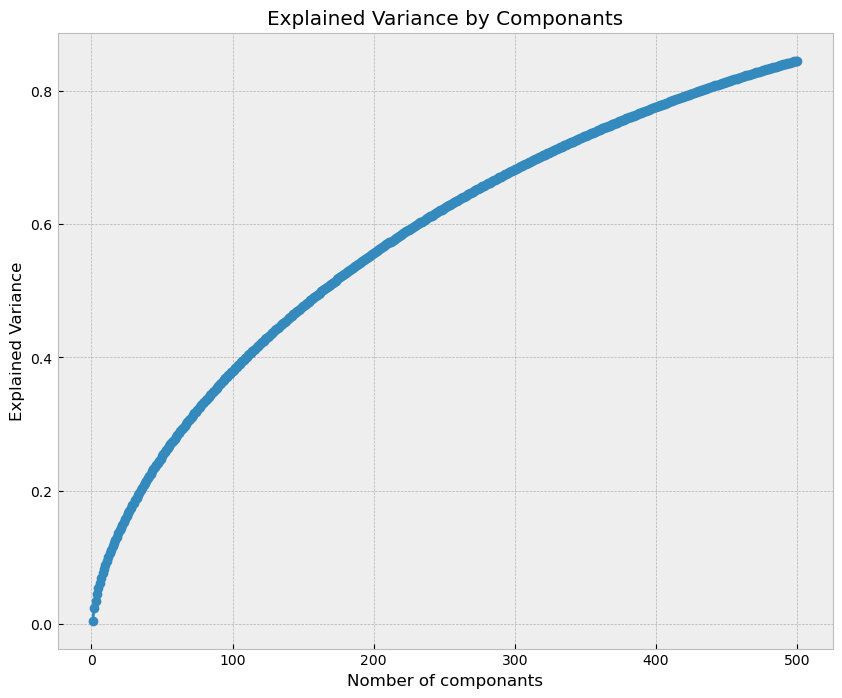

In [155]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 501), clf.explained_variance_ratio_.cumsum(),marker = "o", linestyle = "--")
plt.title("Explained Variance by Componants")
plt.xlabel("Nomber of componants")
plt.ylabel("Explained Variance")


In [156]:
# We are going to take 400 variables 

In [157]:
clf = TruncatedSVD(300)
Xpca_tfidf = clf.fit_transform(X_tfidf)

In [158]:
Xpca_tfidf.shape

(2705, 300)

In [159]:
y_bin.shape

(2705, 100)

In [160]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(Xpca_tfidf, y_bin, test_size = 0.2, random_state = 0) 

Now it's finally ready.

# One vs Rest

To evaluate our models, I'll use the jacard score since it's the best fitted for multi label classification.
Hamming Loss is mostly relevant to Multi-label classification

In [161]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)    
    return jacard.mean()*100
    
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [162]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
#mn = MultinomialNB()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 0.0
Hamming loss: 2.6266173752310538
---
Clf:  SGDClassifier
Jacard score: 36.99850365284746
Hamming loss: 1.9815157116451014
---
Clf:  LogisticRegression
Jacard score: 11.6838306487105
Hamming loss: 2.4140480591497226
---
Clf:  LinearSVC
Jacard score: 32.876507349705136
Hamming loss: 2.0221811460258783
---
Clf:  Perceptron
Jacard score: 31.1095707537482
Hamming loss: 3.0499075785582255
---
Clf:  PassiveAggressiveClassifier
Jacard score: 33.53670051451937
Hamming loss: 2.6487985212569316
---


SGDClassifier

In [163]:
sgd = SGDClassifier()
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, sgd)

Clf:  SGDClassifier
Jacard score: 33.76111257811812
Hamming loss: 2.0314232902033273
---


OneVsRestClassifier

In [164]:
lr = LogisticRegression()

clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, lr)

Clf:  LogisticRegression
Jacard score: 11.6838306487105
Hamming loss: 2.4140480591497226
---


RandomForestClassifier

In [165]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 1.860751694393099
Hamming loss: 2.593345656192237
---


In [166]:
#https://www.kaggle.com/code/miljan/predicting-tags-for-stackoverflow

MLP Classifier

In [167]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 33.951896840066894
Hamming loss: 2.075785582255083
---


Random Forest

In [168]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 2.3690696241528033
Hamming loss: 2.589648798521257
---


GridSearch CV on the best classifier

In [169]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [170]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START estimator__C=1..............................................
[CV 1/5; 1/4] END ............................estimator__C=1; total time=   1.7s
[CV 2/5; 1/4] START estimator__C=1..............................................
[CV 2/5; 1/4] END ............................estimator__C=1; total time=   2.0s
[CV 3/5; 1/4] START estimator__C=1..............................................
[CV 3/5; 1/4] END ............................estimator__C=1; total time=   1.9s
[CV 4/5; 1/4] START estimator__C=1..............................................
[CV 4/5; 1/4] END ............................estimator__C=1; total time=   1.7s
[CV 5/5; 1/4] START estimator__C=1..............................................
[CV 5/5; 1/4] END ............................estimator__C=1; total time=   1.7s
[CV 1/5; 2/4] START estimator__C=10.............................................
[CV 1/5; 2/4] END ...........................esti

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jacard), verbose=10)

In [171]:
CV_svc.best_params_

{'estimator__C': 10}

In [172]:
best_model = CV_svc.best_estimator_

In [173]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score: 35.36649836095307
Hamming loss: 2.463955637707948
---


Confusion matrix

In [174]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

ajax
[[532   1]
 [  4   4]]

algorithm
[[524   6]
 [ 11   0]]

amazon
[[534   2]
 [  5   0]]

android
[[495   6]
 [ 13  27]]

apache
[[531   1]
 [  7   2]]

api
[[521   3]
 [ 10   7]]

array
[[531   1]
 [  4   5]]

asp
[[502  16]
 [  7  16]]

asynchronous
[[535   0]
 [  4   2]]

authentication
[[532   3]
 [  3   3]]

bash
[[526   5]
 [  9   1]]

c
[[357  46]
 [ 65  73]]

chrome
[[537   0]
 [  3   1]]

class
[[533   3]
 [  3   2]]

cocoa
[[519   8]
 [ 13   1]]

code
[[531   1]
 [  9   0]]

command
[[533   2]
 [  6   0]]

core
[[519   9]
 [  7   6]]

cpu
[[534   1]
 [  3   3]]

cs
[[522   2]
 [ 11   6]]

data
[[515  13]
 [  7   6]]

database
[[515   9]
 [ 11   6]]

debugging
[[533   1]
 [  7   0]]

design
[[525   6]
 [ 10   0]]

django
[[527   0]
 [  2  12]]

entity
[[531   3]
 [  2   5]]

event
[[531   0]
 [  6   4]]

file
[[524   4]
 [  8   5]]

framework
[[529   3]
 [  4   5]]

function
[[532   2]
 [  5   2]]

gcc
[[532   3]
 [  5   1]]

git
[[534   1]
 [  0   6]]

google
[[523   6]
 

Exctracting feature importance

In [175]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [176]:
feature_names = vectorizer_X.get_feature_names()

In [177]:
print_top10(feature_names, best_model, multilabel_binarizer.classes_)

--------------------------------------------
ajax: branch actually bool declare 14 --- certificate 10 20 12
--------------------------------------------
--------------------------------------------
algorithm: controller cache employee content anything directory br argument core context
--------------------------------------------
--------------------------------------------
amazon: behind asm control could cod convert correctly detect 32 assign
--------------------------------------------
--------------------------------------------
android: development data correct contain cell delegate 100 -1 1000 00
--------------------------------------------
--------------------------------------------
apache: delegate codelt book describe asm capture develop else cluster blockquote
--------------------------------------------
--------------------------------------------
api: deal constructor 14 assembly 35 document 23 12 50 css
--------------------------------------------
------------------------

# TensorFlow (Keras) 

 # Word2Vec

Word2vec: Implementation with Gensim¶

Robust implementation is not easy.

The gensim package is the reference if you want to embed your words using word2vec.

In [178]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [179]:
# Let's convert the list of sentences to a list of lists of words with a Keras utility function

from tensorflow.keras.preprocessing.text import text_to_word_sequence
import tensorflow as tf
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import gensim

2022-12-02 23:07:43.607045: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 23:07:44.225911: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-02 23:07:44.225953: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-02 23:07:45.879585: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2022-

In [180]:
## Création du modèle Word2Vec

In [181]:
w2v_size = 300
w2v_window = 5
w2v_min_count = 1
w2v_epochs = 10
maxlen = 24  # adapt to length of sentences
sentences = df1['full_review'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [182]:
#sentences[0]

In [183]:
#pip install --upgrade gensim --user

In [184]:
# Création et entraînement du modèle Word2Vec

print("Build & train Word2Vec model ...")
w2v_model = gensim.models.Word2Vec(min_count=w2v_min_count,
                                   window=w2v_window,
                                   vector_size=w2v_size,
                                   seed=42,
                                   workers=1)
#                                                workers=multiprocessing.cpu_count())
w2v_model.build_vocab(sentences)
w2v_model.train(sentences,
                total_examples=w2v_model.corpus_count,
                epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Build & train Word2Vec model ...
Vocabulary size: 32220
Word2Vec trained


In [185]:
#import gensim
#print(gensim.__version__)

In [186]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)
x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen=maxlen,
                            padding='post')

num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 32221


In [187]:
## Création de la matrice d'embedding

In [188]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
w2v_size = 300
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i = 0
j = 0

for word, idx in word_index.items():
    i += 1
    if word in w2v_words:
        j += 1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]

word_rate = np.round(j / i, 4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (32221, 300)


In [189]:
## Création du modèle d'embedding

In [190]:
# Création du modèle

input = Input(shape=(len(x_sentences), maxlen), dtype='float64')
word_input = Input(shape=(maxlen, ), dtype='float64')
word_embedding = Embedding(input_dim=vocab_size,
                           output_dim=w2v_size,
                           weights=[embedding_matrix],
                           input_length=maxlen)(word_input)
word_vec = GlobalAveragePooling1D()(word_embedding)
embed_model = Model([word_input], word_vec)

embed_model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 24)]              0         
                                                                 
 embedding (Embedding)       (None, 24, 300)           9666300   
                                                                 
 global_average_pooling1d (G  (None, 300)              0         
 lobalAveragePooling1D)                                          
                                                                 
Total params: 9,666,300
Trainable params: 9,666,300
Non-trainable params: 0
_________________________________________________________________


2022-12-02 23:08:18.590634: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-12-02 23:08:18.590791: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2022-12-02 23:08:18.590835: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PingLapTop): /proc/driver/nvidia/version does not exist
2022-12-02 23:08:18.592321: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-02 23:08:18.648891: W tensorflow/tsl/framework/cpu_allocator_impl

In [191]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

85/85 [==============================] - 0s 2ms/step


(2705, 300)

In [192]:
#X = df1['full_review']
y = df1['Tags']

In [193]:
x_sentences.shape

(2705, 24)

In [194]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [195]:
y_bin.shape

(2705, 100)

# PCA

In [196]:
clf = TruncatedSVD(20)
Xpca = clf.fit_transform(x_sentences)

In [197]:
clf.explained_variance_ratio_

array([0.07996765, 0.07144341, 0.05400229, 0.04824568, 0.04623979,
       0.04568736, 0.04494647, 0.04291986, 0.04117341, 0.04079311,
       0.04013193, 0.03924277, 0.038694  , 0.03788829, 0.03653104,
       0.03552871, 0.03503715, 0.0347206 , 0.03313755, 0.0323372 ])

Text(0, 0.5, 'Explained Variance')

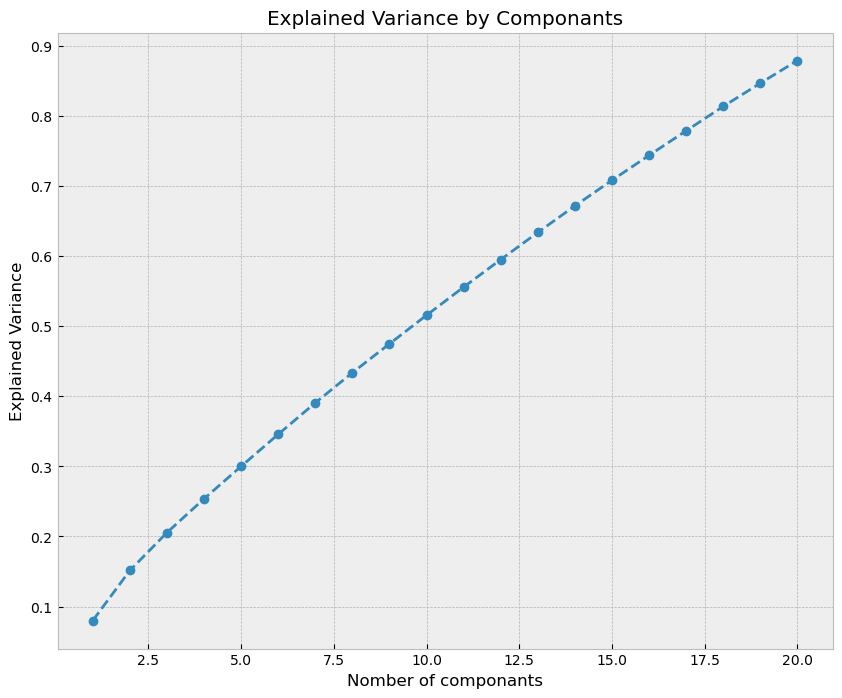

In [198]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), clf.explained_variance_ratio_.cumsum(),marker = "o", linestyle = "--")
plt.title("Explained Variance by Componants")
plt.xlabel("Nomber of componants")
plt.ylabel("Explained Variance")


In [199]:
clf = TruncatedSVD(15)
Xpca_word2vec = clf.fit_transform(x_sentences)

In [200]:
# 80/20 split
X_train, X_test, y_train, y_test = train_test_split(Xpca_word2vec, y_bin, test_size = 0.2, random_state = 0) 

In [201]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)    
    return jacard.mean()*100
    
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [202]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 0.0
Hamming loss: 2.6266173752310538
---
Clf:  SGDClassifier
Jacard score: 2.6627644280139657
Hamming loss: 4.478743068391867
---
Clf:  LogisticRegression
Jacard score: 0.0
Hamming loss: 2.6266173752310538
---
Clf:  LinearSVC
Jacard score: 3.291417134934372
Hamming loss: 11.391866913123845
---
Clf:  Perceptron
Jacard score: 4.437036059032362
Hamming loss: 4.7652495378927915
---
Clf:  PassiveAggressiveClassifier
Jacard score: 2.3436863477594723
Hamming loss: 6.785582255083179
---


In [203]:
SGDClassifier

sklearn.linear_model._stochastic_gradient.SGDClassifier

In [204]:
sgd = SGDClassifier()
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, sgd)

Clf:  SGDClassifier
Jacard score: 2.8235056415441324
Hamming loss: 4.436229205175601
---


In [205]:
OneVsRestClassifier

sklearn.multiclass.OneVsRestClassifier

In [206]:
lr = LogisticRegression()

clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, lr)

Clf:  LogisticRegression
Jacard score: 0.0
Hamming loss: 2.6266173752310538
---


In [207]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [208]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 0.04621072088724584
Hamming loss: 2.6266173752310538
---


MLP Classifier

In [209]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 4.357221644652329
Hamming loss: 4.896487985212569
---


In [210]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [211]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, 
                                      scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START estimator__C=1..............................................
[CV 1/5; 1/4] END ............................estimator__C=1; total time=   1.9s
[CV 2/5; 1/4] START estimator__C=1..............................................
[CV 2/5; 1/4] END ............................estimator__C=1; total time=   1.8s
[CV 3/5; 1/4] START estimator__C=1..............................................
[CV 3/5; 1/4] END ............................estimator__C=1; total time=   1.8s
[CV 4/5; 1/4] START estimator__C=1..............................................
[CV 4/5; 1/4] END ............................estimator__C=1; total time=   1.8s
[CV 5/5; 1/4] START estimator__C=1..............................................
[CV 5/5; 1/4] END ............................estimator__C=1; total time=   1.9s
[CV 1/5; 2/4] START estimator__C=10.............................................
[CV 1/5; 2/4] END ...........................esti

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jacard), verbose=10)

In [212]:
CV_svc.best_params_

{'estimator__C': 1}

In [213]:
best_model = CV_svc.best_estimator_

In [214]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score: 2.900603095134207
Hamming loss: 11.358595194085028
---


Confusion matrix

In [215]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

ajax
[[524   9]
 [  8   0]]

algorithm
[[481  49]
 [ 11   0]]

amazon
[[528   8]
 [  5   0]]

android
[[418  83]
 [ 33   7]]

apache
[[531   1]
 [  9   0]]

api
[[505  19]
 [ 16   1]]

array
[[527   5]
 [  9   0]]

asp
[[488  30]
 [ 21   2]]

asynchronous
[[525  10]
 [  4   2]]

authentication
[[511  24]
 [  6   0]]

bash
[[520  11]
 [ 10   0]]

c
[[312  91]
 [107  31]]

chrome
[[525  12]
 [  4   0]]

class
[[403 133]
 [  3   2]]

cocoa
[[476  51]
 [ 12   2]]

code
[[510  22]
 [  9   0]]

command
[[532   3]
 [  6   0]]

core
[[502  26]
 [ 13   0]]

cpu
[[526   9]
 [  6   0]]

cs
[[521   3]
 [ 17   0]]

data
[[520   8]
 [ 13   0]]

database
[[481  43]
 [ 15   2]]

debugging
[[534   0]
 [  7   0]]

design
[[ 83 448]
 [  0  10]]

django
[[527   0]
 [ 14   0]]

entity
[[494  40]
 [  7   0]]

event
[[500  31]
 [  8   2]]

file
[[459  69]
 [ 12   1]]

framework
[[483  49]
 [  9   0]]

function
[[529   5]
 [  7   0]]

gcc
[[434 101]
 [  5   1]]

git
[[355 180]
 [  4   2]]

google
[[519  10]
 

Exctracting feature importance

In [216]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [217]:
feature_names = vectorizer_X.get_feature_names()

In [218]:
print_top10(feature_names, best_model, multilabel_binarizer.classes_)

--------------------------------------------
ajax: 1000 10 16 100 11 15 12 13 00 ---
--------------------------------------------
--------------------------------------------
algorithm: 13 -gt 16 -1 12 1000 124 00 100 ---
--------------------------------------------
--------------------------------------------
amazon: -1 -gt 1000 16 100 13 10 --- 00 124
--------------------------------------------
--------------------------------------------
android: 1000 12 --- 16 10 -gt 00 -1 13 100
--------------------------------------------
--------------------------------------------
apache: 124 11 10 1000 14 -1 100 13 16 ---
--------------------------------------------
--------------------------------------------
api: -gt 100 124 15 1000 14 13 --- 16 -1
--------------------------------------------
--------------------------------------------
array: 124 -1 13 12 1000 16 00 10 --- 14
--------------------------------------------
--------------------------------------------
asp: 14 100 -gt 11 16 124

In [219]:
#pip install transformers

#BERT

In [220]:
df1

,Id,full_review,clean_tags,Tags
0,10976706,block disposable email address website registr...,php email registration email validation dispos...,[php]
1,19047327,gcc use load without fence storesfence sequent...,c multithreading gcc c x,"[c, multithreading, gcc, c, x]"
2,17134522,compare performance android apps write java xa...,c java android xamarin dot,"[c, java, android]"
3,1791854,diffing two entire directoriesprojects hg git ...,git version control diff cv mercurial,[git]
4,4945153,illegal access web application instance stop a...,java multithreading tomcat jakarta ee jakarta ...,"[java, multithreading]"
...,...,...,...,...
2788,27742285,primary secondary cluster hash pi confuse last...,algorithm data structure hash quadratic probin...,"[algorithm, data]"
2789,8476805,recommendations use graph theory machine learn...,algorithm math artificial intelligence machine...,"[algorithm, machine, learning]"
2790,5427656,ios uiimagepickercontroller result image orien...,io iphone cocoa touch uiimage uiimagepickercon...,"[io, iphone, cocoa, touch]"
2791,6246381,get localize message resourcebundle via annota...,java spring localization annotation resourcebu...,"[java, spring]"


In [221]:
X = df1['full_review']
y = df1['Tags'] 

In [222]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [223]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1['full_review'],y_bin)
X_train.head(4)

1769    execute raw sql flask-sqlalchemy app phow exec...
2349    t-sql split string base delimiter pi data woul...
1966    detect usb insertion removal events windows us...
2313    filelistfiles mangle unicode name jdk 6 unicod...
Name: full_review, dtype: object

In [245]:
#pip install sentence-transformers

In [246]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('all-MiniLM-L6-v2')

In [247]:
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

### Let's create some mock data
def get_mock_up_data():
    #sentence_1 = 'Deep learning is super easy'
    #sentence_2 = 'Deep learning was super bad and too long'
    #sentence_3 = 'This is the best lecture of the camp!'

    X = df1['full_review']
    y = df1['Tags'] 

    ### Let's tokenize the vocabulary 
    tk = Tokenizer()
    tk.fit_on_texts(X)
    vocab_size = len(tk.word_index)
    print(f'There are {vocab_size} different words in your corpus')
    X_token = tk.texts_to_sequences(X)

    ### Pad the inputs
    X_pad = pad_sequences(X_token, dtype='float32', padding='post')
    
    return X_pad, y, vocab_size

X_pad, y, vocab_size = get_mock_up_data()
print("X_pad.shape", X_pad.shape)
X_pad

There are 48407 different words in your corpus
X_pad.shape (2705, 1504)


array([[3.220e+02, 4.220e+03, 5.940e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.550e+02, 2.000e+00, 1.270e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [5.840e+02, 3.300e+02, 3.900e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       ...,
       [1.920e+02, 4.032e+03, 7.700e+01, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [9.000e+00, 7.065e+03, 1.410e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00],
       [1.694e+03, 1.928e+03, 4.390e+02, ..., 0.000e+00, 0.000e+00,
        0.000e+00]], dtype=float32)

In [248]:
#Our sentences we like to encode
sentences = df1['full_review'][0]
#Sentences are encoded by calling model.encode()
embeddings = model.encode(sentences)

In [249]:
#Print the embeddings
for sentence, embedding in zip(sentences, embeddings):
    print("Sentence:", sentence)
    print("Embedding:", embedding)
    print("")

Sentence: b
Embedding: -0.13043217

Sentence: l
Embedding: 0.03529343

Sentence: o
Embedding: 0.026738938

Sentence: c
Embedding: -0.011497093

Sentence: k
Embedding: 0.07769338

Sentence:  
Embedding: -0.03902585

Sentence: d
Embedding: 0.026829368

Sentence: i
Embedding: -0.061344672

Sentence: s
Embedding: -0.0014438677

Sentence: p
Embedding: -0.061124004

Sentence: o
Embedding: 0.0034616608

Sentence: s
Embedding: 0.0065666474

Sentence: a
Embedding: 0.045829028

Sentence: b
Embedding: -0.05057608

Sentence: l
Embedding: -0.047347087

Sentence: e
Embedding: 0.03034804

Sentence:  
Embedding: -0.08798839

Sentence: e
Embedding: 0.08193971

Sentence: m
Embedding: 0.08698673

Sentence: a
Embedding: -0.011548801

Sentence: i
Embedding: 0.04120854

Sentence: l
Embedding: -0.05000792

Sentence:  
Embedding: -0.05011914

Sentence: a
Embedding: 0.059063505

Sentence: d
Embedding: -0.057857733

Sentence: d
Embedding: -0.056876466

Sentence: r
Embedding: 0.018129095

Sentence: e
Embedding: 

In [250]:
#pip install -U sentence-transformers

In [251]:
#pip install ipywidgets==7.4.2

In [252]:
#pip install ipywidgets --user

In [253]:
#pip install ipywidgets

In [254]:
#pip install widgetsnbextension

In [255]:
X = df1['full_review']
y = df1['Tags']

In [256]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

# BERT

In [257]:
import tensorflow as tf
# import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import os
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [258]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
True


## Fonctions communes

In [259]:
# Fonction de préparation des sentences
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = AutoTokenizer.from_pretrained(model_type)
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
    time2 = np.round(time.time() - time1,0)
    print("temps traitement : ", time2)
     
    return features_bert, last_hidden_states_tot

## BERT HuggingFace

### 'bert-base-uncased'

In [260]:
max_length = 64
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)
sentences = df1['full_review'].to_list()

loading configuration file config.json from cache at /home/ping/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading weights file tf_model.h5 from cache at /home/ping/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/tf_mo

In [261]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

loading configuration file config.json from cache at /home/ping/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/config.json
Model config BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.25.1",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

loading file vocab.txt from cache at /home/ping/.cache/huggingface/hub/models--bert-base-uncased/snapshots/0a6aa9128b6194f4f3c4db429b6cb4891cdb421b/vocab.txt
loadi

1/1 [==============================] - 1s 531ms/step


1/1 [==============================] - 1s 548ms/step
temps traitement :  188.0


In [263]:
features_bert.shape

(2700, 768)

In [264]:
df1 = df1.sample(n = 2700,replace=True)

In [265]:
y = df1['Tags']
y.shape

(2700,)

In [266]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [267]:
y_bin.shape

(2700, 100)

# PCA

In [268]:
clf = TruncatedSVD(60)
Xpca = clf.fit_transform(features_bert)

In [269]:
clf.explained_variance_ratio_

array([0.02028566, 0.09974051, 0.07608234, 0.07371747, 0.04338105,
       0.03200576, 0.03070636, 0.02733343, 0.02343397, 0.02118871,
       0.01856418, 0.0178825 , 0.01607204, 0.01388222, 0.01365482,
       0.01265668, 0.01141577, 0.01028452, 0.00986772, 0.00961551,
       0.00908218, 0.00844633, 0.00835588, 0.00797201, 0.00763498,
       0.00730723, 0.00713437, 0.00690588, 0.00652758, 0.00636262,
       0.0062888 , 0.00602509, 0.00593904, 0.00573194, 0.00569647,
       0.00556452, 0.00543098, 0.00525074, 0.00516549, 0.00499691,
       0.00487604, 0.00457418, 0.00452853, 0.00440033, 0.00437649,
       0.0043478 , 0.00416226, 0.00402375, 0.00393854, 0.00383127,
       0.00374995, 0.00372564, 0.00362167, 0.00353358, 0.00343313,
       0.00332604, 0.00326756, 0.00321394, 0.00308665, 0.00294527],
      dtype=float32)

Text(0, 0.5, 'Explained Variance')

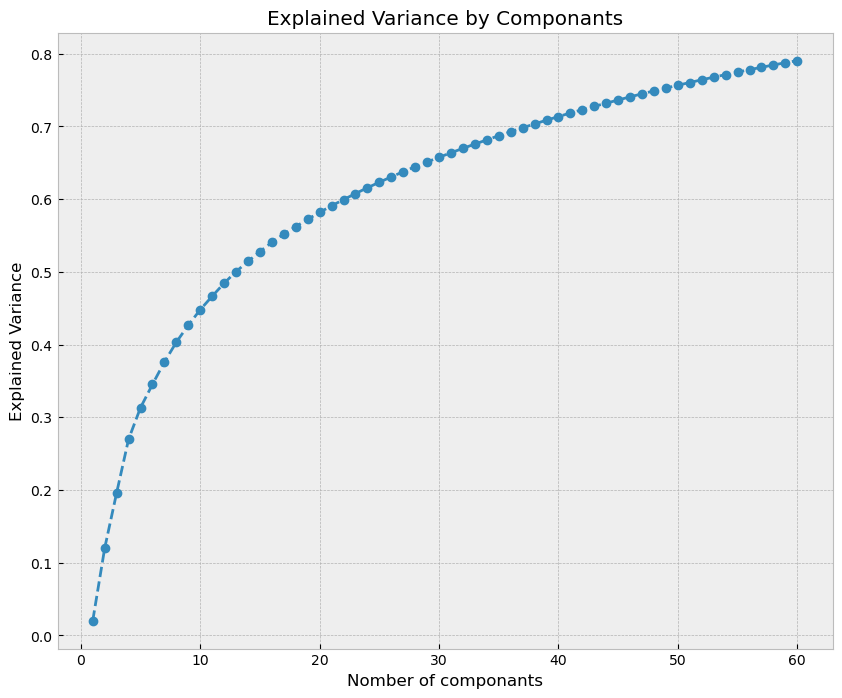

In [270]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 61), clf.explained_variance_ratio_.cumsum(),marker = "o", linestyle = "--")
plt.title("Explained Variance by Componants")
plt.xlabel("Nomber of componants")
plt.ylabel("Explained Variance")

In [271]:
clf = TruncatedSVD(50)
Xpca_features_bert = clf.fit_transform(features_bert)

In [272]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca_features_bert,y_bin, test_size = 0.2, random_state = 0)

In [273]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)    
    return jacard.mean()*100
    
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [274]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression(solver='liblinear')
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 0.0
Hamming loss: 2.6
---
Clf:  SGDClassifier
Jacard score: 1.7215608465608465
Hamming loss: 3.4351851851851847
---
Clf:  LogisticRegression
Jacard score: 0.15432098765432098
Hamming loss: 2.6037037037037036
---
Clf:  LinearSVC
Jacard score: 0.0
Hamming loss: 2.6018518518518516
---
Clf:  Perceptron
Jacard score: 3.826499118165785
Hamming loss: 4.568518518518518
---
Clf:  PassiveAggressiveClassifier
Jacard score: 0.7735890652557319
Hamming loss: 3.064814814814815
---


In [275]:
SGDClassifier

sklearn.linear_model._stochastic_gradient.SGDClassifier

In [276]:
sgd = SGDClassifier()
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, sgd)

Clf:  SGDClassifier
Jacard score: 0.5573192239858906
Hamming loss: 3.022222222222222
---


In [277]:
OneVsRestClassifier

sklearn.multiclass.OneVsRestClassifier

In [278]:
lr = LogisticRegression(solver='liblinear')
clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, lr)

Clf:  LogisticRegression
Jacard score: 0.15432098765432098
Hamming loss: 2.6037037037037036
---


In [279]:
RandomForestClassifier

sklearn.ensemble._forest.RandomForestClassifier

In [280]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 0.0
Hamming loss: 2.6
---


MLP Classifier

In [281]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 1.338183421516755
Hamming loss: 2.674074074074074
---


GridSearch CV on the best classifier

In [282]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [283]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START estimator__C=1..............................................
[CV 1/5; 1/4] END ............................estimator__C=1; total time=   9.1s
[CV 2/5; 1/4] START estimator__C=1..............................................
[CV 2/5; 1/4] END ............................estimator__C=1; total time=   8.8s
[CV 3/5; 1/4] START estimator__C=1..............................................
[CV 3/5; 1/4] END ............................estimator__C=1; total time=   9.0s
[CV 4/5; 1/4] START estimator__C=1..............................................
[CV 4/5; 1/4] END ............................estimator__C=1; total time=   9.0s
[CV 5/5; 1/4] START estimator__C=1..............................................
[CV 5/5; 1/4] END ............................estimator__C=1; total time=   9.1s
[CV 1/5; 2/4] START estimator__C=10.............................................
[CV 1/5; 2/4] END ...........................esti

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jacard), verbose=10)

In [284]:
CV_svc.best_params_

{'estimator__C': 100}

In [285]:
best_model = CV_svc.best_estimator_

In [286]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score: 1.8961640211640212
Hamming loss: 4.609259259259259
---


Confusion matrix

In [287]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

ajax
[[532   0]
 [  8   0]]

algorithm
[[533   0]
 [  7   0]]

amazon
[[537   0]
 [  3   0]]

android
[[502   0]
 [ 38   0]]

apache
[[  2 531]
 [  0   7]]

api
[[527   0]
 [ 13   0]]

array
[[531   0]
 [  9   0]]

asp
[[510   0]
 [ 30   0]]

asynchronous
[[537   0]
 [  3   0]]

authentication
[[534   0]
 [  6   0]]

bash
[[533   0]
 [  7   0]]

c
[[317  73]
 [123  27]]

chrome
[[536   0]
 [  4   0]]

class
[[538   0]
 [  2   0]]

cocoa
[[521   0]
 [ 19   0]]

code
[[536   0]
 [  4   0]]

command
[[536   0]
 [  4   0]]

core
[[521   0]
 [ 19   0]]

cpu
[[533   0]
 [  7   0]]

cs
[[528   0]
 [ 12   0]]

data
[[527   0]
 [ 13   0]]

database
[[521   0]
 [ 19   0]]

debugging
[[536   0]
 [  4   0]]

design
[[525   0]
 [ 15   0]]

django
[[528   0]
 [ 12   0]]

entity
[[534   0]
 [  6   0]]

event
[[535   0]
 [  5   0]]

file
[[525   0]
 [ 15   0]]

framework
[[533   0]
 [  7   0]]

function
[[534   0]
 [  6   0]]

gcc
[[536   0]
 [  4   0]]

git
[[534   0]
 [  6   0]]

google
[[529   0]
 

Exctracting feature importance

In [288]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [289]:
feature_names = vectorizer_X.get_feature_names()

In [290]:
print_top10(feature_names, best_model, multilabel_binarizer.classes_)

--------------------------------------------
ajax: 12 20 23 50 17 -- actual action 14 algorithm
--------------------------------------------
--------------------------------------------
algorithm: action access 42 algorithm add 22 32 activity achieve accept
--------------------------------------------
--------------------------------------------
amazon: achieve 23 16 1000 12 35 actual 37 17 40
--------------------------------------------
--------------------------------------------
android: 30 10 able advance 42 17 across action --- achieve
--------------------------------------------
--------------------------------------------
apache: 17 11 15 10 activity 1000 active 22 accept --
--------------------------------------------
--------------------------------------------
api: accept actually activity account -gt 100 42 124 19 35
--------------------------------------------
--------------------------------------------
array: ajax 100 activity 15 address algorithm actually -- additional a

# USE - Universal Sentence Encoder

https://www.analyticsvidhya.com/blog/2020/08/top-4-sentence-embedding-techniques-using-python/

Universal Sentence Encoder
One of the most well-performing sentence embedding techniques right now is the Universal Sentence Encoder. And it should come as no surprise from anybody that it has been proposed by Google. The key feature here is that we can use it for Multi-task learning.

This means that the sentence embeddings we generate can be used for multiple tasks like sentiment analysis, text classification, sentence similarity, etc, and the results of these asks are then fed back to the model to get even better sentence vectors that before.

The most interesting part is that this encoder is based on two encoder models and we can use either of the two:

Transformer
Deep Averaging Network(DAN)
Both of these models are capable of taking a word or a sentence as input and generating embeddings for the same. The following is the basic flow:

Tokenize the sentences after converting them to lowercase
Depending on the type of encoder, the sentence gets converted to a 512-dimensional vector
If we use the transformer, it is similar to the encoder module of the transformer architecture and uses the self-attention mechanism.
The DAN option computes the unigram and bigram embeddings first and then averages them to get a single embedding. This is then passed to a deep neural network to get a final sentence embedding of 512 dimensions.
These sentence embeddings are then used for various unsupervised and supervised tasks like Skipthoughts, NLI, etc. The trained model is then again reused to generate a new 512 dimension sentence embedding.

In [296]:
#pip install tensorflow_hub

In [297]:
import os 
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow.keras
from tensorflow.keras import backend as K

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model

# Bert
import transformers
from transformers import *

os.environ["TF_KERAS"]='1'

In [298]:
print(tf.__version__)
print(tensorflow.__version__)
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
print(tf.test.is_built_with_cuda())

2.11.0
2.11.0
Num GPUs Available:  0
True


In [299]:
#pip uninstall h5py

In [300]:
#pip install h5py

In [301]:
#pip install tensorflow_hub

In [302]:
import tensorflow_hub as hub
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [303]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size
    time1 = time.time()

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    time2 = np.round(time.time() - time1,0)
    return features

In [304]:
batch_size = 10
sentences = df1['full_review'].to_list()

In [305]:
features_USE = feature_USE_fct(sentences, batch_size)

In [306]:
features_USE

array([[-0.05319591, -0.05318357,  0.05066704, ...,  0.05382539,
        -0.05330012, -0.0528362 ],
       [ 0.04785833, -0.05370529,  0.05352459, ...,  0.05285101,
         0.03901493,  0.01628367],
       [-0.06036184,  0.03263906, -0.05482752, ...,  0.06197131,
         0.01023421, -0.06147538],
       ...,
       [ 0.03461864, -0.08500867,  0.00687242, ...,  0.07178123,
        -0.0682246 , -0.05702784],
       [ 0.05520307, -0.0548198 , -0.0428109 , ...,  0.06349713,
         0.03785285, -0.02647866],
       [-0.06346089,  0.06535253, -0.01595176, ...,  0.07344008,
        -0.05826112, -0.06774182]], dtype=float32)

In [307]:
features_USE.shape

(2700, 512)

In [308]:
df1.shape

(2700, 4)

In [309]:
df1

,Id,full_review,clean_tags,Tags
1746,14680944,create opencv camera matrix iphone 5 solvepnp ...,iphone opencv computer vision augmented realit...,[iphone]
702,13580826,postgresql - repeat row limit offset pi notice...,sql postgresql sql order limit offset,"[sql, sql]"
2138,9881819,better way restartreload gunicorn via upstart ...,django nginx reload gunicorn upstart,[django]
2773,44561180,multiple tab fragment inside bottom navigation...,android android fragment tab tabnavigator andr...,"[android, android, android]"
1395,13046019,winforms applicationexit vs environmentexit vs...,c net window vb net winforms,"[c, net, window, net]"
...,...,...,...,...
1579,26567480,static properties swift pi try convert follow ...,io class swift static method static member,"[io, class, swift, static, static]"
1466,23858236,add remove columns woocommerce admin product l...,php wordpress woocommerce product backend,[php]
1513,63447,perform sql select phow perform codeif thencod...,sql sql server tsql statement case,"[sql, sql, server]"
2204,7103864,practical use applicative style pi scala progr...,scala haskell f functional programming applica...,[programming]


In [310]:
#df1 = df1.sample(n = 2690,replace=True)

In [311]:
y = df1['Tags']

In [312]:
multilabel_binarizer = MultiLabelBinarizer()
y_bin = multilabel_binarizer.fit_transform(y)

In [313]:
y_bin.shape

(2700, 100)

# USE PCA

In [314]:
from sklearn.decomposition import TruncatedSVD

In [315]:
clf = TruncatedSVD(500)
Xpca = clf.fit_transform(features_USE)

In [316]:
clf.explained_variance_ratio_

array([7.77257513e-03, 4.22012098e-02, 3.65330502e-02, 3.46316062e-02,
       2.93145850e-02, 2.76155584e-02, 2.60399207e-02, 2.34433748e-02,
       2.02352311e-02, 1.87566821e-02, 1.73599049e-02, 1.57182515e-02,
       1.51854213e-02, 1.42285479e-02, 1.35437101e-02, 1.31082628e-02,
       1.25825275e-02, 1.20018357e-02, 1.17220785e-02, 1.07555864e-02,
       1.04236500e-02, 1.02384798e-02, 9.68200620e-03, 9.48659424e-03,
       9.15016793e-03, 9.08068474e-03, 8.79026577e-03, 8.48220196e-03,
       8.29778519e-03, 7.80409062e-03, 7.74043892e-03, 7.57130422e-03,
       7.45040691e-03, 7.17687421e-03, 7.06953090e-03, 6.95343269e-03,
       6.85334392e-03, 6.61951676e-03, 6.52823737e-03, 6.31527882e-03,
       6.24094438e-03, 6.08310383e-03, 6.00402756e-03, 5.72113087e-03,
       5.64558199e-03, 5.55439899e-03, 5.39337425e-03, 5.36466483e-03,
       5.25163766e-03, 5.20134298e-03, 5.09953033e-03, 4.95636836e-03,
       4.93804831e-03, 4.85792290e-03, 4.76425048e-03, 4.69865371e-03,
      

Text(0, 0.5, 'Explained Variance')

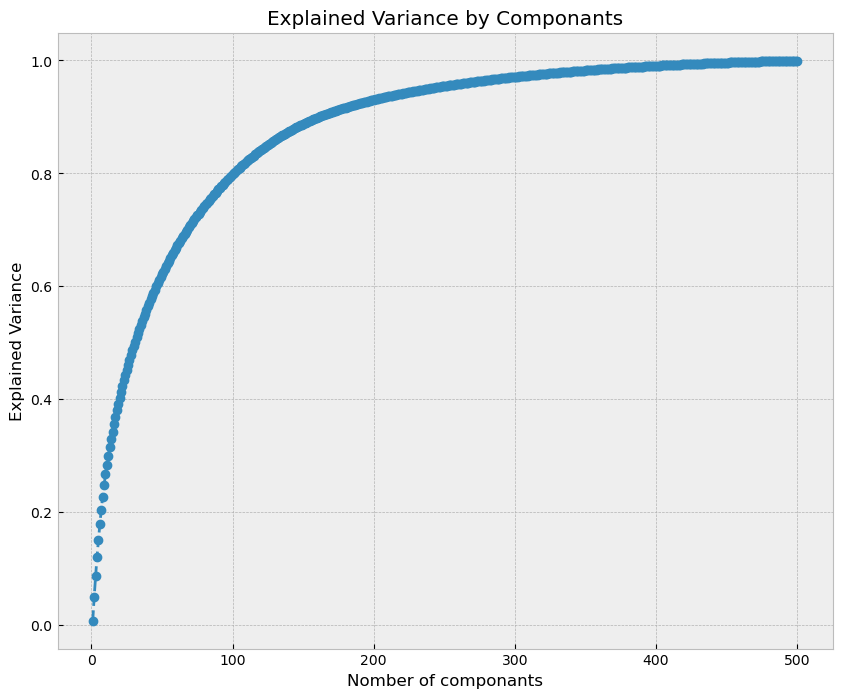

In [317]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 501), clf.explained_variance_ratio_.cumsum(),marker = "o", linestyle = "--")
plt.title("Explained Variance by Componants")
plt.xlabel("Nomber of componants")
plt.ylabel("Explained Variance")

In [318]:
clf = TruncatedSVD(100)
Xpca_features_USE = clf.fit_transform(features_USE)

In [319]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(Xpca_features_USE,y_bin, test_size = 0.2, random_state = 0)

In [320]:
def avg_jacard(y_true,y_pred):
    jacard = np.minimum(y_true,y_pred).sum(axis=1) / np.maximum(y_true,y_pred).sum(axis=1)    
    return jacard.mean()*100
    
def print_score(y_pred, clf):
    print("Clf: ", clf.__class__.__name__)
    print("Jacard score: {}".format(avg_jacard(y_test, y_pred)))
    print("Hamming loss: {}".format(hamming_loss(y_pred, y_test)*100))
    print("---")

In [321]:
from sklearn.linear_model import Perceptron
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.svm import LinearSVC
dummy = DummyClassifier()
sgd = SGDClassifier()
lr = LogisticRegression()
svc = LinearSVC()
perceptron = Perceptron()
pac = PassiveAggressiveClassifier()

for classifier in [dummy, sgd, lr, svc, perceptron, pac]:
    clf = OneVsRestClassifier(classifier)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print_score(y_pred, classifier)

Clf:  DummyClassifier
Jacard score: 0.0
Hamming loss: 2.6
---
Clf:  SGDClassifier
Jacard score: 51.54159318048206
Hamming loss: 1.4851851851851852
---
Clf:  LogisticRegression
Jacard score: 25.540784832451497
Hamming loss: 2.085185185185185
---
Clf:  LinearSVC
Jacard score: 48.248897707231045
Hamming loss: 1.6037037037037036
---
Clf:  Perceptron
Jacard score: 47.9782480893592
Hamming loss: 1.848148148148148
---
Clf:  PassiveAggressiveClassifier
Jacard score: 56.32407407407407
Hamming loss: 1.5833333333333335
---


In [322]:
SGDClassifier

sklearn.linear_model._stochastic_gradient.SGDClassifier

In [323]:
sgd = SGDClassifier()
clf = OneVsRestClassifier(sgd)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, sgd)

Clf:  SGDClassifier
Jacard score: 52.672031158142275
Hamming loss: 1.5185185185185186
---


In [324]:
OneVsRestClassifier

sklearn.multiclass.OneVsRestClassifier

In [325]:
lr = LogisticRegression()

clf = OneVsRestClassifier(lr)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print_score(y_pred, lr)

Clf:  LogisticRegression
Jacard score: 25.540784832451497
Hamming loss: 2.085185185185185
---


MLP Classifier

In [326]:
from sklearn.neural_network import MLPClassifier
mlpc = MLPClassifier()
mlpc.fit(X_train, y_train)

y_pred = mlpc.predict(X_test)

print_score(y_pred, mlpc)

Clf:  MLPClassifier
Jacard score: 47.62720458553792
Hamming loss: 1.5925925925925926
---


In [327]:
#Random Forest

In [328]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

y_pred = rfc.predict(X_test)

print_score(y_pred, rfc)

Clf:  RandomForestClassifier
Jacard score: 60.23148148148149
Hamming loss: 1.0574074074074074
---


GridSearch CV on the best classifier

In [329]:
param_grid = {'estimator__C':[1,10,100,1000]
              }

In [330]:
svc = OneVsRestClassifier(LinearSVC())
CV_svc = model_selection.GridSearchCV(estimator=svc, param_grid=param_grid, cv= 5, verbose=10, scoring=make_scorer(avg_jacard,greater_is_better=True))
CV_svc.fit(X_train, y_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
[CV 1/5; 1/4] START estimator__C=1..............................................
[CV 1/5; 1/4] END ............................estimator__C=1; total time=   0.6s
[CV 2/5; 1/4] START estimator__C=1..............................................
[CV 2/5; 1/4] END ............................estimator__C=1; total time=   0.5s
[CV 3/5; 1/4] START estimator__C=1..............................................
[CV 3/5; 1/4] END ............................estimator__C=1; total time=   0.6s
[CV 4/5; 1/4] START estimator__C=1..............................................
[CV 4/5; 1/4] END ............................estimator__C=1; total time=   0.5s
[CV 5/5; 1/4] START estimator__C=1..............................................
[CV 5/5; 1/4] END ............................estimator__C=1; total time=   0.5s
[CV 1/5; 2/4] START estimator__C=10.............................................
[CV 1/5; 2/4] END ...........................esti

GridSearchCV(cv=5, estimator=OneVsRestClassifier(estimator=LinearSVC()),
             param_grid={'estimator__C': [1, 10, 100, 1000]},
             scoring=make_scorer(avg_jacard), verbose=10)

In [331]:
CV_svc.best_params_

{'estimator__C': 100}

In [332]:
best_model = CV_svc.best_estimator_

In [333]:
y_pred = best_model.predict(X_test)

print_score(y_pred, best_model)

Clf:  OneVsRestClassifier
Jacard score: 62.82157554379777
Hamming loss: 1.525925925925926
---


Confusion matrix

In [334]:
for i in range(y_train.shape[1]):
    print(multilabel_binarizer.classes_[i])
    print(confusion_matrix(y_test[:,i], y_pred[:,i]))
    print("")

ajax
[[532   0]
 [  2   6]]

algorithm
[[528   5]
 [  0   7]]

amazon
[[536   1]
 [  0   3]]

android
[[501   1]
 [  6  32]]

apache
[[531   2]
 [  3   4]]

api
[[526   1]
 [  5   8]]

array
[[528   3]
 [  0   9]]

asp
[[504   6]
 [  4  26]]

asynchronous
[[536   1]
 [  0   3]]

authentication
[[533   1]
 [  2   4]]

bash
[[531   2]
 [  2   5]]

c
[[362  28]
 [ 42 108]]

chrome
[[536   0]
 [  1   3]]

class
[[536   2]
 [  0   2]]

cocoa
[[514   7]
 [  9  10]]

code
[[532   4]
 [  1   3]]

command
[[534   2]
 [  1   3]]

core
[[514   7]
 [  3  16]]

cpu
[[533   0]
 [  1   6]]

cs
[[525   3]
 [  1  11]]

data
[[526   1]
 [  8   5]]

database
[[511  10]
 [  3  16]]

debugging
[[531   5]
 [  2   2]]

design
[[516   9]
 [  7   8]]

django
[[528   0]
 [  3   9]]

entity
[[531   3]
 [  0   6]]

event
[[535   0]
 [  0   5]]

file
[[518   7]
 [ 11   4]]

framework
[[528   5]
 [  1   6]]

function
[[528   6]
 [  2   4]]

gcc
[[533   3]
 [  1   3]]

git
[[534   0]
 [  0   6]]

google
[[522   7]
 

Exctracting feature importance

In [335]:
def print_top10(feature_names, clf, class_labels):
    """Prints features with the highest coefficient values, per class"""
    for i, class_label in enumerate(class_labels):
        top10 = np.argsort(clf.coef_[i])[-10:]
        print("--------------------------------------------")
        print("%s: %s" % (class_label,
              " ".join(feature_names[j] for j in top10)))
        print("--------------------------------------------")

In [336]:
feature_names = vectorizer_X.get_feature_names()

In [337]:
print_top10(feature_names, best_model, multilabel_binarizer.classes_)

--------------------------------------------
ajax: apply assume ap another action 00 124 35 18 already
--------------------------------------------
--------------------------------------------
algorithm: 1000 15 --- application actual also 20 action authenticate assign
--------------------------------------------
--------------------------------------------
amazon: -gt additional async arguments agt android asm 18 also 13
--------------------------------------------
--------------------------------------------
android: 15 alert attribute architecture algorithm 22 14 actually async accept
--------------------------------------------
--------------------------------------------
apache: 35 1000 apply address also allow attribute authenticate always answer
--------------------------------------------
--------------------------------------------
api: alert across achieve add active arguments answer application appreciate ajax
--------------------------------------------
--------------------

# What is the Jaccard Index?

The Jaccard similarity index (sometimes called the Jaccard similarity coefficient) compares members for two sets to see which members are shared and which are distinct. It’s a measure of similarity for the two sets of data, with a range from 0% to 100%. The higher the percentage, the more similar the two populations. Although it’s easy to interpret, it is extremely sensitive to small samples sizes and may give erroneous results, especially with very small samples or data sets with missing observations.

How to Calculate the Jaccard Index
The formula to find the Index is:

Jaccard Index = (the number in both sets) / (the number in either set) * 100

The same formula in notation is:
J(X,Y) = |X∩Y| / |X∪Y|

# Hamming loss

Hamming loss is the fraction of wrong labels to the total number of labels. In multi-class classification, hamming loss is calculated as the hamming distance between y_true and y_pred . In multi-label classification, hamming loss penalizes only the individual labels.

In [338]:
df1

,Id,full_review,clean_tags,Tags
1746,14680944,create opencv camera matrix iphone 5 solvepnp ...,iphone opencv computer vision augmented realit...,[iphone]
702,13580826,postgresql - repeat row limit offset pi notice...,sql postgresql sql order limit offset,"[sql, sql]"
2138,9881819,better way restartreload gunicorn via upstart ...,django nginx reload gunicorn upstart,[django]
2773,44561180,multiple tab fragment inside bottom navigation...,android android fragment tab tabnavigator andr...,"[android, android, android]"
1395,13046019,winforms applicationexit vs environmentexit vs...,c net window vb net winforms,"[c, net, window, net]"
...,...,...,...,...
1579,26567480,static properties swift pi try convert follow ...,io class swift static method static member,"[io, class, swift, static, static]"
1466,23858236,add remove columns woocommerce admin product l...,php wordpress woocommerce product backend,[php]
1513,63447,perform sql select phow perform codeif thencod...,sql sql server tsql statement case,"[sql, sql, server]"
2204,7103864,practical use applicative style pi scala progr...,scala haskell f functional programming applica...,[programming]


In [339]:
tags_Count =df1['clean_tags'].value_counts()
tags_Count

c c parsing multipartform data multipart                       6
python flask oauth oauth google oauth                          6
c sql transaction ado net rollback                             5
c optimization compiler construction standard infinite loop    5
window git directory gitignore visual studio                   5
                                                              ..
authentication session owasp zap penetration testing           1
c reflection c constexpr compile time                          1
python get authorization token python request                  1
java image resize jpeg photo                                   1
sql sql server tsql statement case                             1
Name: clean_tags, Length: 1677, dtype: int64

In [340]:
Tags_Count =df1['clean_tags'].value_counts()[:30]
Tags_Count[:30]

c c parsing multipartform data multipart                                               6
python flask oauth oauth google oauth                                                  6
c sql transaction ado net rollback                                                     5
c optimization compiler construction standard infinite loop                            5
window git directory gitignore visual studio                                           5
iphone wcf authentication certificate x                                                5
javascript node j firebase google cloud platform google cloud firestore                5
objective c cocoa dictionary enums hashtable                                           5
c comparison refactoring unsigned signed                                               5
java unit testing junit mocking mockito                                                5
python numpy scipy python imaging library color space                                  5
python haskell functi

<AxesSubplot:>

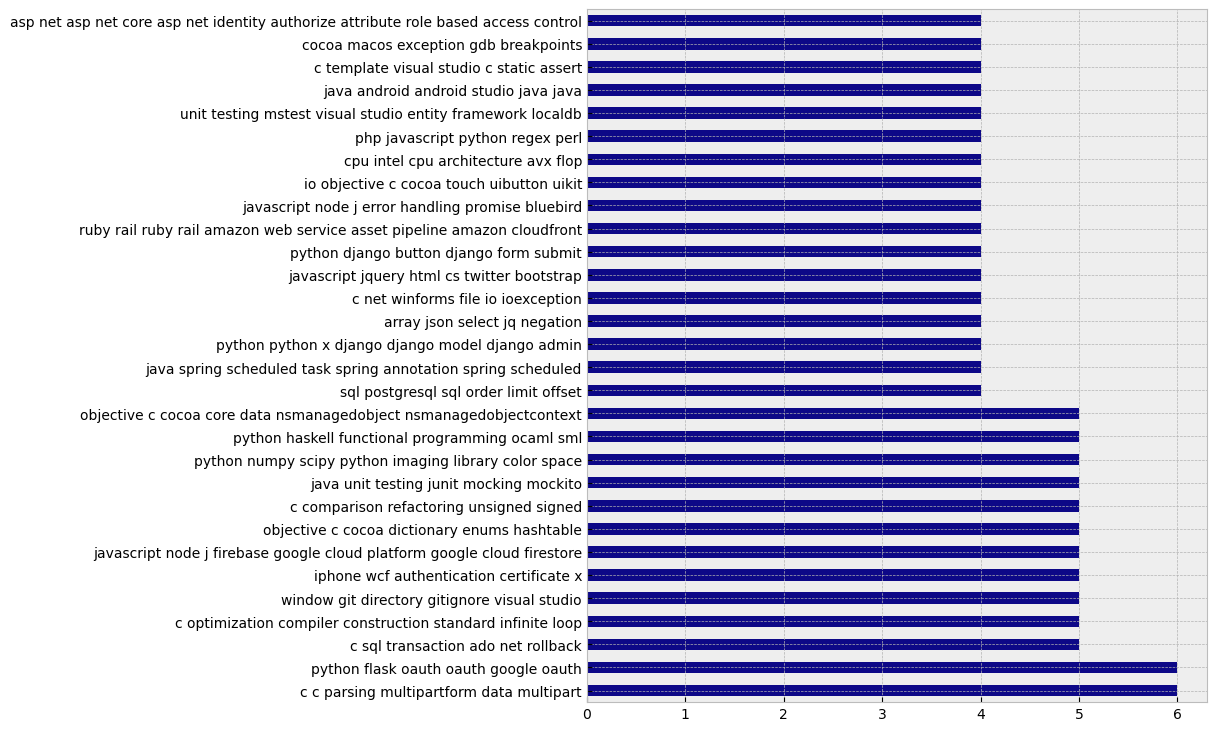

In [341]:
Tags_Count.plot(kind='barh',label='tags Count',figsize=(8,9),colormap='plasma')

<AxesSubplot:>

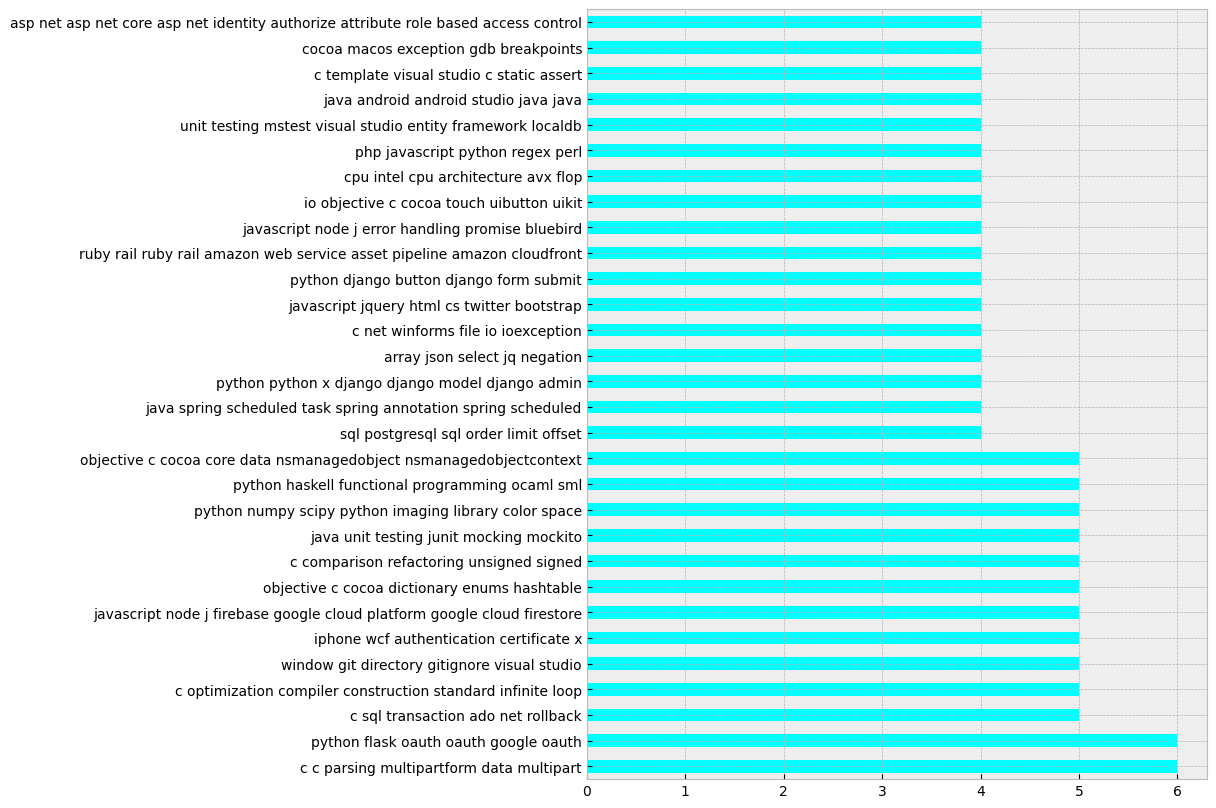

In [342]:
Tags_Count.plot(kind='barh',label='Tags Count Top 30',figsize=(8,10),colormap='cool')

In [343]:
#pip install networkx

In [344]:
#pip install --upgrade networkx

In [345]:
import networkx as nx
import seaborn as sns
%matplotlib inline

In [346]:
# https://www.kaggle.com/code/fanbyprinciple/text-exploration-of-shakespearean-plays


wrdcld = pd.Series(df1['full_review'].tolist()).astype(str)

In [347]:
df1.groupby('clean_tags').count()

,Id,full_review,Tags
clean_tags,,,
ajax django webserver comet tornado,2,2,2
algorithm data structure geospatial latitude longitude geography,1,1,1
algorithm data structure hash quadratic probing linear probing,1,1,1
algorithm data structure haskell list queue,3,3,3
algorithm data structure tree binary tree postorder,1,1,1
...,...,...,...
xcode xcode intellisense code completion symbol found,1,1,1
xml android http soap post,1,1,1
xml http special character htmlspecialchars entityreference,1,1,1


In [348]:
play_data = df1.groupby('clean_tags').count().sort_values(by='full_review', ascending=False)['full_review']
play_data

clean_tags
python flask oauth oauth google oauth                                 6
c c parsing multipartform data multipart                              6
c comparison refactoring unsigned signed                              5
python numpy scipy python imaging library color space                 5
objective c cocoa core data nsmanagedobject nsmanagedobjectcontext    5
                                                                     ..
java try catch finally try catch finally try finally                  1
java type conversion byte core short                                  1
c net vb net debugging reverse engineering                            1
c net task parallel library async await threadpool                    1
java cryptography rsa bouncycastle jce                                1
Name: full_review, Length: 1677, dtype: int64

In [349]:
play_data = play_data.to_frame()
play_data

,full_review
clean_tags,
python flask oauth oauth google oauth,6
c c parsing multipartform data multipart,6
c comparison refactoring unsigned signed,5
python numpy scipy python imaging library color space,5
objective c cocoa core data nsmanagedobject nsmanagedobjectcontext,5
...,...
java try catch finally try catch finally try finally,1
java type conversion byte core short,1
c net vb net debugging reverse engineering,1


In [350]:
play_data.index = np.arange(0, len(play_data))

In [351]:
full_text = "\n".join(df1.full_review)
print(len(full_text))

2641590


In [352]:
import collections
import re

In [353]:
counter = 1
for i in df1.full_review:
    print(i)
    print(re.sub('[^A-Za-z]+', ' ', i).strip().lower())
    if counter>5:
        break
    counter+=1

create opencv camera matrix iphone 5 solvepnp pi develop application iphone use opencv use method solvepnpransac p pa href httpopencvwillowgaragecomdocumentationcppcameracalibrationand3dreconstructionhtml rel nofollow noreferrer httpopencvwillowgaragecomdocumentationcppcameracalibrationand3dreconstructionhtmla p pfor method need provide camera matrix br br 124 fx 0 cx 124 br 124 0 fy cy 124 br 124 0 0 1 124 p pwhere cx cy represent center pixel position image fx fy represent focal lengths documentation say unsure provide focal lengths iphone 5 focal length 41 mm think value usable isp pi check another website p pa href httpdocsopencvorgmodulescalib3ddoccameracalibrationand3dreconstructionhtml rel nofollow noreferrer httpdocsopencvorgmodulescalib3ddoccameracalibrationand3dreconstructionhtmlap pwhich show opencv create camera matrices state focal lengths measure pixel units p pi check another website p pa href httpwwwvelocityreviewscomforumst500283-focal-length-in-pixelshtml rel nofollow

In [354]:
# ignoring punctuation and captalisation

def ignore_punctuation(text_array):
    return [re.sub('[^A-Za-z]+', ' ', line ).strip().lower() for line in text_array]

lines = ignore_punctuation(df1.full_review)

In [355]:
print(lines[0])
print(lines[1])

create opencv camera matrix iphone solvepnp pi develop application iphone use opencv use method solvepnpransac p pa href httpopencvwillowgaragecomdocumentationcppcameracalibrationand dreconstructionhtml rel nofollow noreferrer httpopencvwillowgaragecomdocumentationcppcameracalibrationand dreconstructionhtmla p pfor method need provide camera matrix br br fx cx br fy cy br p pwhere cx cy represent center pixel position image fx fy represent focal lengths documentation say unsure provide focal lengths iphone focal length mm think value usable isp pi check another website p pa href httpdocsopencvorgmodulescalib ddoccameracalibrationand dreconstructionhtml rel nofollow noreferrer httpdocsopencvorgmodulescalib ddoccameracalibrationand dreconstructionhtmlap pwhich show opencv create camera matrices state focal lengths measure pixel units p pi check another website p pa href httpwwwvelocityreviewscomforumst focal length in pixelshtml rel nofollow noreferrer httpwwwvelocityreviewscomforumst fo

In [356]:
def tokenize(lines, token='word'):
    if token=='word':
        return [line.split(' ') for line in lines]
    
    elif token=='char':
        return [list(line) for line in lines]
    
    else :
        print('ERROR: unknown type: ' + token)

tokens = tokenize(lines)

In [357]:
for i in range(5):
    print(tokens[i])

['create', 'opencv', 'camera', 'matrix', 'iphone', 'solvepnp', 'pi', 'develop', 'application', 'iphone', 'use', 'opencv', 'use', 'method', 'solvepnpransac', 'p', 'pa', 'href', 'httpopencvwillowgaragecomdocumentationcppcameracalibrationand', 'dreconstructionhtml', 'rel', 'nofollow', 'noreferrer', 'httpopencvwillowgaragecomdocumentationcppcameracalibrationand', 'dreconstructionhtmla', 'p', 'pfor', 'method', 'need', 'provide', 'camera', 'matrix', 'br', 'br', 'fx', 'cx', 'br', 'fy', 'cy', 'br', 'p', 'pwhere', 'cx', 'cy', 'represent', 'center', 'pixel', 'position', 'image', 'fx', 'fy', 'represent', 'focal', 'lengths', 'documentation', 'say', 'unsure', 'provide', 'focal', 'lengths', 'iphone', 'focal', 'length', 'mm', 'think', 'value', 'usable', 'isp', 'pi', 'check', 'another', 'website', 'p', 'pa', 'href', 'httpdocsopencvorgmodulescalib', 'ddoccameracalibrationand', 'dreconstructionhtml', 'rel', 'nofollow', 'noreferrer', 'httpdocsopencvorgmodulescalib', 'ddoccameracalibrationand', 'dreconstr

In [358]:
def count_corpus(tokens):
    token_dict = {}
    
    for token in tokens:
        for i in token:
            if i not in token_dict.keys():
                token_dict[i] = 1
            else:
                token_dict[i] += 1
    
    #print(token_dict)
    
    if len(tokens)==0 or isinstance(tokens[0], list):
        print("tokens needs flattening")
        tokens = [token for line in tokens for token in line ]
    new_dict = collections.Counter(tokens)
    
    #print(new_dict)
    return new_dict

In [359]:
count_corpus(tokens[:5])

tokens needs flattening


Counter({'create': 4,
         'opencv': 4,
         'camera': 5,
         'matrix': 3,
         'iphone': 4,
         'solvepnp': 1,
         'pi': 7,
         'develop': 1,
         'application': 2,
         'use': 6,
         'method': 2,
         'solvepnpransac': 1,
         'p': 18,
         'pa': 5,
         'href': 6,
         'httpopencvwillowgaragecomdocumentationcppcameracalibrationand': 2,
         'dreconstructionhtml': 2,
         'rel': 5,
         'nofollow': 3,
         'noreferrer': 5,
         'dreconstructionhtmla': 1,
         'pfor': 1,
         'need': 2,
         'provide': 2,
         'br': 4,
         'fx': 6,
         'cx': 2,
         'fy': 6,
         'cy': 2,
         'pwhere': 1,
         'represent': 2,
         'center': 2,
         'pixel': 4,
         'position': 4,
         'image': 2,
         'focal': 7,
         'lengths': 3,
         'documentation': 1,
         'say': 2,
         'unsure': 2,
         'length': 7,
         'mm': 1,
         'th

In [360]:
class Vocab:
    def __init__(self, tokens=None, min_freq=0, reserved_tokens=None):
        if tokens==None:
            tokens=[]
        if reserved_tokens==None:
            reserved_tokens=[]
        
        counter = count_corpus(tokens)
        
        self._token_freqs = sorted(counter.items(), key=lambda x: x[1], reverse=1)
        
        self.idx_to_token = ['<unk>'] + reserved_tokens
        
        self.token_to_idx = {token: idx for idx, token in enumerate(self.idx_to_token)}
        
        for token, freq in self._token_freqs:
            if freq < min_freq:
                break
            if token not in self.token_to_idx:
                self.idx_to_token.append(token)
                self.token_to_idx[token] = len(self.idx_to_token) -1 
        
    
    def __len__(self):
        return len(self.idx_to_token)
    
    def __getitem__(self, tokens):
        if not isinstance(tokens, (list, tuple)):
            return self.token_to_idx.get(tokens, self.unk)
        return [self.__getitem(token) for token in tokens]
    
    def to_tokens(self, indices):
        if not isinstance(indices, (list, tuple)):
            return self.idx_to_token[indices]
        return [self.idx_to_token[index] for index in indices]
    
    def unk(self):
        return 0
    
    def token_freqs(self):
        return self.token_freqs

In [361]:
vocab = Vocab(tokens)

tokens needs flattening


In [362]:
print(list(vocab.token_to_idx.items())[:50])

[('<unk>', 0), ('p', 1), ('use', 2), ('lt', 3), ('pi', 4), ('codepre', 5), ('gt', 6), ('code', 7), ('href', 8), ('get', 9), ('file', 10), ('like', 11), ('new', 12), ('would', 13), ('x', 14), ('return', 15), ('c', 16), ('class', 17), ('try', 18), ('data', 19), ('work', 20), ('rel', 21), ('name', 22), ('error', 23), ('noreferrer', 24), ('int', 25), ('want', 26), ('need', 27), ('string', 28), ('way', 29), ('android', 30), ('function', 31), ('one', 32), ('value', 33), ('run', 34), ('public', 35), ('create', 36), ('make', 37), ('find', 38), ('test', 39), ('app', 40), ('ul', 41), ('type', 42), ('set', 43), ('precode', 44), ('image', 45), ('follow', 46), ('time', 47), ('add', 48), ('know', 49)]


In [363]:
corpus = [vocab[token] for line in tokens for token in line]

In [364]:
print("Total length of corpus: ", len(corpus))
print("Vocab size of text: ", len(vocab))

Total length of corpus:  332265
Vocab size of text:  30566
